# Dogecoin Price Prediction with ML

<img src='./doge-usd-dataset-cover.jpg' width=600, height=400>

in this project, i will be predicting Dogecoin price for the next 10 weeks after the last close value in 24th August 2021. Here is the
<a href='https://www.kaggle.com/datasets/imakash3011/dogecoin-cryptocurrency-dataset?select=Weekly-DOGE-USD.csv'>dataset source</a>

About Dataset
Context

Dogecoin (DOGE) is a cryptocurrency . Users are able to generate DOGE through the process of mining. Dogecoin has a current supply of 149.23 billion. The last known price of Dogecoin is $0.2487 USD and is up %6.6 over the last 24 hours. It is currently trading on 1.218 active market(s) with  $9.57 billion traded over the last 24 hours. More information can be found at http://dogecoin.com/.

Dogecoin is generally used in:
1. <b>Internet Tipping:</b>
Dogecoin is widely used for tipping content creators on platforms like Reddit and Twitter, thanks to its low fees and fast transactions.
2. <b>Micro-Payments:</b>
With very low transaction fees (on average $0.02) and fast confirmation times, Dogecoin is ideal for small daily transactions.
3. <b>Online Shopping and Payments:</b>
A growing number of online merchants accept Dogecoin as a form of payment for goods and services.
4. <b>Donations and Charity Campaigns:</b>
The Dogecoin community has a strong track record of engaging in charitable giving and crowdfunding initiatives.
5. Entertainment and Betting:
Due to its low cost and high speed, Dogecoin is used on some platforms for gaming and betting purposes.
(Source: Gov.Capital, NDAX.io)

<i>-this information table was generated by ChatGPT</i>


### Content

Two csv file are present in dataset section 
a. First one contains daily based data of Dogecoin and have approx. 1462 rows in dataset.
b. Second one contains weekly based data of Dogecoin and have approx. 211 rows in dataset.

<h>Dataset is from 24-Aug-2017 to 24-Aug-2021.</h>

### Attributes

Date :- Date of trading

Open :- Price from the first transaction of a trading day

High :- Maximum price in a trading day

Low :- Minimum price in a trading day

Close:- Price from the last transaction of a trading day

Adj Close :- Closing price adjusted to reflect the value after accounting for any corporate actions

Volume :- Number of units traded in a day

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import regression

In [13]:
df=pd.read_csv('Weekly-DOGE-USD.csv.xls')

In [14]:
# EDA - Exploring the dataset

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,0.001731,0.001845,0.001722,0.001760,0.001760,11627730
1,2017-08-28,0.001764,0.002701,0.001751,0.002153,0.002153,89730630
2,2017-09-04,0.002169,0.002169,0.001254,0.001395,0.001395,68488510
3,2017-09-11,0.001397,0.001578,0.000626,0.000853,0.000853,74876590
4,2017-09-18,0.000853,0.000983,0.000712,0.000892,0.000892,36490930


In [16]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
206,2021-08-02,0.204279,0.281379,0.193750,0.240045,0.240045,19198032161
207,2021-08-09,0.240122,0.348722,0.231410,0.341441,0.341441,34318088606
208,2021-08-16,0.340165,0.350953,0.282016,0.314963,0.314963,30840040458
209,2021-08-23,0.314926,0.328094,0.313368,0.317914,0.317914,2836628655
210,2021-08-24,0.317984,0.319460,0.309601,0.310288,0.310288,2136630016


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       211 non-null    object 
 1   Open       211 non-null    float64
 2   High       211 non-null    float64
 3   Low        211 non-null    float64
 4   Close      211 non-null    float64
 5   Adj Close  211 non-null    float64
 6   Volume     211 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


In [18]:
df.shape

(211, 7)

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,211.000000,211.000000,211.000000,211.000000,211.000000,2.110000e+02
mean,0.034900,0.044317,0.028526,0.036401,0.036401,6.237180e+09
std,0.093846,0.120362,0.074392,0.095849,0.095849,2.296492e+10
min,0.000853,0.000983,0.000626,0.000853,0.000853,1.162773e+07
25%,0.002370,0.002567,0.002199,0.002380,0.002380,1.147483e+08
50%,0.002787,0.003186,0.002614,0.002837,0.002837,3.798986e+08
75%,0.005090,0.005938,0.004334,0.005309,0.005309,1.109912e+09
max,0.569687,0.737567,0.373631,0.570070,0.570070,2.105880e+11


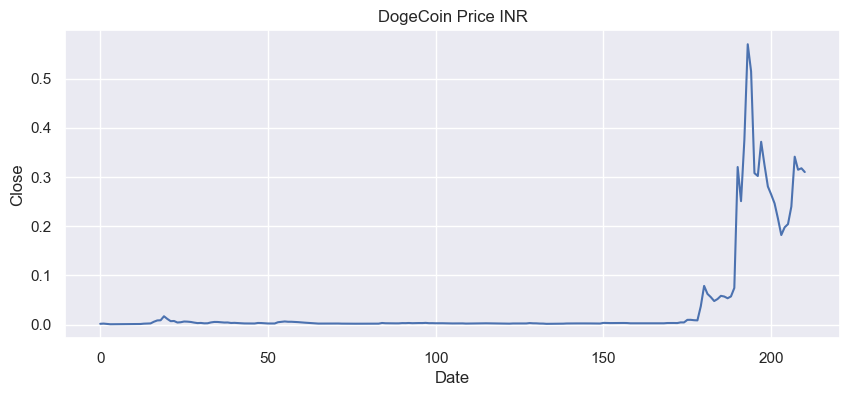

In [20]:
# Plotting the Dataset
sns.set()
#plt.style.use('seaborn-whitegrid')

df.dropna()
df["Date"] = pd.to_datetime(df["Date"])
#df = df.set_index("Date")

plt.figure(figsize=(10, 4))
plt.title("DogeCoin Price INR")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()


In [22]:
# Predicting price

from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(df, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
print("DogeCoin Price Prediction")
print(forecast)

Using 4 cpus for n_jobs.
Data frequency is: W-MON, used frequency is: W-MON
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 25
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 25
Model Number: 9 with model ETS in generation 0 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model GLM in generation 0 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 11 with model GLM in generation 0 of 25
Model Number: 12 with model GLS in generation 0 of 25
Model Number: 13 with model GLS in generation 0 of 25
Model Number: 14 with model LastValueNaive in generation 0 of 25
Model Number: 15 with model LastValueNaive in generation 0 of 25
Model Number: 16 with model LastValueNaive in generation 0 of 25
Model Number: 17 with model LastValueNaive in generation 0 of 25
Model Number: 18 with model SeasonalNaive in generation 0 of 25
Model Number: 19 with model SeasonalNaive in generation 0 of 25
Model Number: 20 with model SeasonalNaive in generation 0 of 25
Model Number: 21 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Model Number: 23 with model WindowRegression in generation 0 of 25
Model Number: 2

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 35 in generation 0: FBProphet
Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 38 in generation 0: ARCH
Model Number: 39 with model Cassandra in generation 0 of 25
Model Number: 40 with model S

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 42 with model Cassandra in generation 0 of 25
Model Number: 43 with model Cassandra in generation 0 of 25
Model Number: 44 with model SectionalMotif in generation 0 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 45 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 45 in generation 0: FBProphet
Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Template Eval Error: ValueError('maximum supported dimension for an ndarray is currently 64, found 190') in model 48 in generation 0: BasicLinearModel
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model BasicLinearModel in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 52 in generation 0: FBProphet
Model Number: 53 with model ETS in generation 0 of 25
Model Number: 54 with model FBProphet in generation 0 of 25
Template Eval Er

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 57 with model ARDL in generation 0 of 25
Model Number: 58 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model ConstantNaive in generation 0 of 25
Model Number: 60 with model LastValueNaive in generation 0 of 25
Model Number: 61 with model AverageValueNaive in generation 0 of 25
Model Number: 62 with model GLS in generation 0 of 25
Model Number: 63 with model SeasonalNaive in generation 0 of 25
Model Number: 64 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 64 in generation 0: VAR
Model Number: 65 with model WindowRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 65 in generation 0: WindowRegression
Model Number: 66 with model DatepartRegression in generation 0 of 25
Model Number

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 75 with model ConstantNaive in generation 0 of 25
Model Number: 76 with model LastValueNaive in generation 0 of 25
Model Number: 77 with model DatepartRegression in generation 0 of 25
Model Number: 78 with model SeasonalNaive in generation 0 of 25
Model Number: 79 with model MetricMotif in generation 0 of 25
Model Number: 80 with model ETS in generation 0 of 25
2021-06-28 00:00:00
2021-06-28 00:00:00
2021-06-28 00:00:00
Model Number: 81 with model LastValueNaive in generation 0 of 25
Model Number: 82 with model LastValueNaive in generation 0 of 25
Model Number: 83 with model SectionalMotif in generation 0 of 25
Model Number: 84 with model UnivariateMotif in generation 0 of 25
Model Number: 85 with model UnivariateMotif in generation 0 of 25
Model Number: 86 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 86 in generation 0: ARCH
Model Number: 87 with model ETS in generation 0 of 25
Model Number: 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 97 in generation 0: ARDL
Model Number: 98 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 98 in generation 0: ARCH
Model Number: 99 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 99 in generation 0: ARCH
Model Number: 100 with model GLM in generation 0 of 25
Model Number: 101 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 101 in generation 0: VAR
Model Number: 102 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 102 in generation 0: FBProphet
Model Number: 103 with model LastValueNaive in generation 0 of 25
Model Number: 104 with model RRVAR in generation 0 of 25
Model Number: 105 with model Averag

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: ValueError('Only gave one variable to VAR') in model 108 in generation 0: VAR
Model Number: 109 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 109 in generation 0: ARCH
Model Number: 110 with model SeasonalityMotif in generation 0 of 25
Model Number: 111 with model FFT in generation 0 of 25
Model Number: 112 with model AverageValueNaive in generation 0 of 25
Model Number: 113 with model ConstantNaive in generation 0 of 25
Model Number: 114 with model ETS in generation 0 of 25
Model Number: 115 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 115 in generation 0: ARCH
Model Number: 116 with model AverageValueNaive in generation 0 of 25
Model Number: 117 with model AverageValueNaive in generation 0 of 25
Model Number: 118 with model LastValueNaive in generation 0 of 25
Model Number: 119 with model FBProphet in gener

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 135 with model LastValueNaive in generation 0 of 25
Model Number: 136 with model AverageValueNaive in generation 0 of 25
Model Number: 137 with model LastValueNaive in generation 0 of 25
Model Number: 138 with model ARDL in generation 0 of 25
Model Number: 139 with model SeasonalityMotif in generation 0 of 25
Model Number: 140 with model ConstantNaive in generation 0 of 25
Model Number: 141 with model SectionalMotif in generation 0 of 25
Model Number: 142 with model SeasonalityMotif in generation 0 of 25
Model Number: 143 with model SectionalMotif in generation 0 of 25
Model Number: 144 with model SeasonalityMotif in generation 0 of 25
Model Number: 145 with model MetricMotif in generation 0 of 25
Model Number: 146 with model SeasonalNaive in generation 0 of 25
Model Number: 147 with model ARDL in generation 0 of 25
Model Number: 148 with model AverageValueNaive in generation 0 of 25
Model Number: 149 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/s

Model Number: 171 with model AverageValueNaive in generation 1 of 25
Model Number: 172 with model Cassandra in generation 1 of 25
Model Number: 173 with model LastValueNaive in generation 1 of 25
Model Number: 174 with model ARDL in generation 1 of 25
Model Number: 175 with model FFT in generation 1 of 25
Model Number: 176 with model LastValueNaive in generation 1 of 25
Model Number: 177 with model SeasonalityMotif in generation 1 of 25
Model Number: 178 with model ConstantNaive in generation 1 of 25
Model Number: 179 with model FFT in generation 1 of 25
Model Number: 180 with model RRVAR in generation 1 of 25
Model Number: 181 with model SeasonalityMotif in generation 1 of 25
Model Number: 182 with model SectionalMotif in generation 1 of 25
Model Number: 183 with model SeasonalNaive in generation 1 of 25
Model Number: 184 with model LastValueNaive in generation 1 of 25
Model Number: 185 with model SeasonalNaive in generation 1 of 25
Model Number: 186 with model AverageValueNaive in ge

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 196 with model ETS in generation 1 of 25
Model Number: 197 with model LastValueNaive in generation 1 of 25
Model Number: 198 with model RRVAR in generation 1 of 25
Model Number: 199 with model SectionalMotif in generation 1 of 25
Model Number: 200 with model LastValueNaive in generation 1 of 25
Model Number: 201 with model LastValueNaive in generation 1 of 25
Model Number: 202 with model AverageValueNaive in generation 1 of 25
Model Number: 203 with model SeasonalityMotif in generation 1 of 25
Model Number: 204 with model SectionalMotif in generation 1 of 25
Model Number: 205 with model ConstantNaive in generation 1 of 25
Model Number: 206 with model ETS in generation 1 of 25
Model Number: 207 with model SectionalMotif in generation 1 of 25
Model Number: 208 with model SectionalMotif in generation 1 of 25
Model Number: 209 with model ETS in generation 1 of 25
Model Number: 210 with model UnivariateMotif in generation 1 of 25
Template Eval Error: ValueError('Model Univaria

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 217 with model FFT in generation 1 of 25
Model Number: 218 with model UnivariateMotif in generation 1 of 25
Model Number: 219 with model ETS in generation 1 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 220 with model SectionalMotif in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 49, 'method': 2}, '1': {}, '2': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'observation_model': [[1

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 236 with model UnivariateMotif in generation 1 of 25
Model Number: 237 with model UnivariateMotif in generation 1 of 25
Model Number: 238 with model ETS in generation 1 of 25
Model Number: 239 with model ARDL in generation 1 of 25
Model Number: 240 with model MetricMotif in generation 1 of 25
Model Number: 241 with model LastValueNaive in generation 1 of 25
Model Number: 242 with model ETS in generation 1 of 25
Model Number: 243 with model ARDL in generation 1 of 25
Model Number: 244 with model RRVAR in generation 1 of 25
Model Number: 245 with model SectionalMotif in generation 1 of 25
Model Number: 246 with model RRVAR in generation 1 of 25
Model Number: 247 with model RRVAR in generation 1 of 25
Model Number: 248 with model SeasonalityMotif in generation 1 of 25
Model Number: 249 with model ConstantNaive in generation 1 of 25
Model Number: 250 with model SeasonalityMotif in generation 1 of 25
Model Number: 251 with model RRVAR in generation 1 of 25
Model Number: 252 wi

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no nei

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'AlignLastValue', '3': 'DatepartRegression'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}}, '2': {'rows': 168, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'lunar_phase', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': 4}}}. fail_on_forecast_nan=True") in model 256 in generation 1: ConstantNaive
Model Number: 257 with model LastValueNaive in generation 1

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 263 with model LastValueNaive in generation 2 of 25
Model Number: 264 with model RRVAR in generation 2 of 25
Model Number: 265 with model UnivariateMotif in generation 2 of 25
Model Number: 266 with model SectionalMotif in generation 2 of 25
Model Number: 267 with model ETS in generation 2 of 25
Model Number: 268 with model UnivariateMotif in generation 2 of 25
Model Number: 269 with model LastValueNaive in generation 2 of 25
Model Number: 270 with model LastValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': None, 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False, 'on_inverse': False}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'm

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 310 in generation 2: SeasonalityMotif
Model Number: 311 with model ARDL in generation 2 of 25
Model Number: 312 with model SeasonalityMotif in generation 2 of 25
Model Number: 313 with model SeasonalNaive in generation 2 of 25
Model Number: 314 with model UnivariateMotif in generation 2 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 315 with model SeasonalityMotif in generation 2 of 25
Model Number: 316 with model SeasonalityMotif in generation 2 of 25
Model Number: 317 with model SeasonalNaive in generation 2 of 25
Model Number: 318 with model ARDL in generation 2 of 25
Model Number: 319 with model DatepartRegression in generation 2 of 25
Model Number: 320 with model LastValueNaive in generation 2 of 25
Model Number: 321 with model RRVAR in generation 2 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 322 with model AverageValueNaive in generation 2 of 25
Model Number: 323 with model Cassandra in generation 2 of 25
Model Number: 324 with model RRVAR in generation 2 of 25
Model Number: 325 with model AverageValueNaive in generation 2 of 25
Model Number: 326 with model DatepartRegression in generation 2 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 327 with model Cassandra in generation 2 of 25
Model Number: 328 with model AverageValueNaive in generation 2 of 25
Model Number: 329 with model FFT in generation 2 of 25
Model Number: 330 with model ConstantNaive in generation 2 of 25
Model Number: 331 with model ETS in generation 2 of 25
Model Number: 332 with model FFT in generation 2 of 25
Model Number: 333 with model UnivariateMotif in generation 2 of 25
Model Number: 334 with model ETS in generation 2 of 25
Model Number: 335 with model UnivariateMotif in generation 2 of 25
Model Number: 336 with model SectionalMotif in generation 2 of 25
2021-06-28 00:00:00
2021-06-28 00:00:00
2021-06-28 00:00:00


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 337 with model SeasonalNaive in generation 2 of 25
Model Number: 338 with model LastValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'det_order': 0, 'k_ar_diff': 0}, '2': {}} with error ValueError('Coint only works on multivarate series')") in model 338 in generation 2: LastValueNaive
Model Number: 339 with model SeasonalNaive in generation 2 of 25
Model Number: 340 with model ETS in generation 2 of 25
Model Number: 341 with model Cassandra in generation 2 of 25
Model Number: 342 with model SectionalMotif in generation 2 of 25
Template Eval Error: ValueError('Shape of passed values is (10, 2), indices imply (10, 1)') in model 342 in generation 2: SectionalMotif
Model Number: 343 with model MetricMotif in generation 2 of 25
Model Number: 344 wi

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 355 with model ConstantNaive in generation 2 of 25
Model Number: 356 with model GLM in generation 2 of 25
Model Number: 357 with model RRVAR in generation 2 of 25
Model Number: 358 with model UnivariateMotif in generation 2 of 25
Model Number: 359 with model ETS in generation 2 of 25
Model Number: 360 with model RRVAR in generation 2 of 25
Model Number: 361 with model LastValueNaive in generation 2 of 25
Model Number: 362 with model ETS in generation 2 of 25
Model Number: 363 with model BasicLinearModel in generation 2 of 25
Model Number: 364 with model ETS in generation 2 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 365 with model ETS in generation 2 of 25
Model Number: 366 with model SectionalMotif in generation 2 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 366 in generation 2: SectionalMotif
Model Number: 367 with model ETS in generation 2 of 25
New Generation: 3 of 25
Model Number: 368 with model AverageValueNaive in generation 3 of 25
Model Number: 369 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 369 in generation 3: DatepartRegression
Model Number: 370 with model SectionalMotif in generation 3 of 25
Model Number: 371 with model LastValueNaive in generation 3 of 25
Model Number: 372 with model SeasonalityMotif in generation 3 of 25
Model Number: 373 with model ConstantNaive in generation 3 of 25
Model Number: 374 with model AverageValueNaive in generation 3 of 25
Model Number: 375 with model ARDL in generation 3 of

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 388 with model LastValueNaive in generation 3 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params mean {'0': {'lag_1': 1440, 'method': 5}, '1': {'method': 'butter', 'method_args': {'N': 6, 'window_size': 12, 'btype': 'highpass', 'analog': False, 'output': 'sos'}}, '2': {}} with error ValueError('cannot reshape array of size 190 into shape (0,1440,newaxis)')") in model 388 in generation 3: LastValueNaive
Model Number: 389 with model SeasonalityMotif in generation 3 of 25
Model Number: 390 with model ETS in generation 3 of 25
Model Number: 391 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 391 in generation 3: DatepartRegression
Model Number: 392 with model LastValueNaive in generation 3 of 25
Model Number: 393 with model MetricMotif in generation 3 of 25
Model Number: 394 with model Cassandra in generation 3 of 25
Model Number: 3

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 397 with model ETS in generation 3 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {'fixed': True, 'window': 28, 'macro_micro': False, 'center': False}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 397 in generation 3: ETS
Model Number: 398 with model GLS in generation 3 of 25
Model Number: 399 with model MetricMotif in generation 3 of 25
Model Number: 400 with model SeasonalNaive in generation 3 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 401 with model Cassandra in generation 3 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'FFTDecomposition', '1': 'PowerTransformer', '2': 'MinMaxScaler', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'n_harmonics': -0.5, 'detrend': 'linear'}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1, 'threshold_method': 'max'}}}. fail_on_forecast_nan=True") in model 401 in generation 3: Cassandra
Model Number: 402 with model ARDL in generation 3 of 25
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             holiday_flag_US\nDate                       \n2017-11-06              0.0\n2017-11-13              0.0\n2017-11-20              0.0\n2017-11-27              0.0\n2017-12-04              0.0\n...        

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 414 with model GLM in generation 3 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 414 in generation 3: GLM
Model Number: 415 with model MetricMotif in generation 3 of 25
Model Number: 416 with model ETS in generation 3 of 25
Model Number: 417 with model MetricMotif in generation 3 of 25
Model Number: 418 with model ARDL in generation 3 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'ClipOutliers', '1': 'MeanPercentSplitter', '2': 'PowerTransformer', '3': 'Round'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4.5, 'fillna': None}, '1': {'window': 3}, '2': {}, '3': {'decimals': 2, 'on_transform': True, 'on_inverse': True}}}. fail_on_forecast_nan=True") in model 418 in generation 3: ARDL
Model Number: 419 with model BasicLinearModel in generation 3 of 25
Model Number: 420 with model ARDL in generation 3 of

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 446 with model LastValueNaive in generation 3 of 25
Model Number: 447 with model SeasonalNaive in generation 3 of 25
Model Number: 448 with model LastValueNaive in generation 3 of 25
Model Number: 449 with model UnivariateMotif in generation 3 of 25
Model Number: 450 with model UnivariateMotif in generation 3 of 25
Model Number: 451 with model ARDL in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 451 in generation 3: ARDL
Model Number: 452 with model AverageValueNaive in generation 3 of 25
Model Number: 453 with model SectionalMotif in generation 3 of 25
Model Number: 454 with model MetricMotif in generation 3 of 25
Model Number: 455 with model RRVAR in generation 3 of 25
Model Number: 456 with model ETS in generation 3 of 25
Model Number: 457 with model SectionalMotif in generation 3 of 25
Model Number: 458 with model BasicLinearModel in generation 3 of 25
Model Number: 459 with model AverageValueN

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 473 with model RRVAR in generation 4 of 25
Model Number: 474 with model MetricMotif in generation 4 of 25
Model Number: 475 with model LastValueNaive in generation 4 of 25
Model Number: 476 with model SeasonalNaive in generation 4 of 25
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params ffill {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 0.5, 'window': 10, 'quantile': 0.98}, 'bounds_only': False, 'fillna': None}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'PCA'}, 'transformation_params': {'0': {'whiten': False, 'n_components': 24}}}, 'isolated_only': True, 'on_inverse': False}, '2': {'window_size': 30, 'alpha': 2.0, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'rolling_diff_5nn'}, '3': 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 499 with model ETS in generation 4 of 25
Model Number: 500 with model UnivariateMotif in generation 4 of 25
Model Number: 501 with model SectionalMotif in generation 4 of 25
Model Number: 502 with model UnivariateMotif in generation 4 of 25
Model Number: 503 with model LastValueNaive in generation 4 of 25
Model Number: 504 with model SeasonalNaive in generation 4 of 25
Model Number: 505 with model SectionalMotif in generation 4 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 505 in generation 4: SectionalMotif
Model Number: 506 with model MetricMotif in generation 4 of 25
Model Number: 507 with model SectionalMotif in generation 4 of 25
Model Number: 508 with model GLS in generation 4 of 25
Model Number: 509 with model ETS in generation 4 of 25
Model Number: 510 with model UnivariateMotif in generation 4 of 25
Model Number: 511 with model GLM in generation 4 of 25
Model Number: 512 with model LastValueNaive in gen

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 541 with model DatepartRegression in generation 4 of 25
Model Number: 542 with model ETS in generation 4 of 25
Model Number: 543 with model Cassandra in generation 4 of 25
Model Number: 544 with model AverageValueNaive in generation 4 of 25
Model Number: 545 with model ARDL in generation 4 of 25
Model Number: 546 with model ARDL in generation 4 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 547 with model AverageValueNaive in generation 4 of 25
Model Number: 548 with model SeasonalityMotif in generation 4 of 25
Model Number: 549 with model GLS in generation 4 of 25
Model Number: 550 with model FFT in generation 4 of 25
Model Number: 551 with model SectionalMotif in generation 4 of 25
Model Number: 552 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (553) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (187).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2017-11-06   6.0  0.0  2458063.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2017-11-13  13.0  0.0  2458070.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2017-11-20  20.0  0.0  2458077.5  0.0  0.0  0.0  0

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 578 with model AverageValueNaive in generation 5 of 25
Model Number: 579 with model ETS in generation 5 of 25
Model Number: 580 with model RRVAR in generation 5 of 25
Model Number: 581 with model LastValueNaive in generation 5 of 25
Model Number: 582 with model SeasonalityMotif in generation 5 of 25
Model Number: 583 with model SeasonalNaive in generation 5 of 25
Model Number: 584 with model GLM in generation 5 of 25
Model Number: 585 with model ARDL in generation 5 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (277) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (189).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2017-11-06   6.0  0.0  2458063.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2017-11-13  13.0  0.0  2458070.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2017-11-20  20.0  0.0  2458077.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2017-11-27  27.0  0.0  2458084.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2017-12-04   4.0  0.0  2458091.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n...          ...  ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   \n2021-05-24  24.0  0.0  2459358.5  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   \n2021-05-31  31.0  0.0  2459365.5  

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 593 with model GLM in generation 5 of 25
Model Number: 594 with model SectionalMotif in generation 5 of 25
Model Number: 595 with model RRVAR in generation 5 of 25
Model Number: 596 with model SeasonalNaive in generation 5 of 25
Model Number: 597 with model GLS in generation 5 of 25
Model Number: 598 with model MetricMotif in generation 5 of 25
Model Number: 599 with model MetricMotif in generation 5 of 25
Model Number: 600 with model ARDL in generation 5 of 25
Model Number: 601 with model ARDL in generation 5 of 25
Model Number: 602 with model GLS in generation 5 of 25
Model Number: 603 with model SectionalMotif in generation 5 of 25
Template Eval Error: ValueError('kth(=10) out of bounds (2)') in model 603 in generation 5: SectionalMotif
Model Number: 604 with model MetricMotif in generation 5 of 25
Model Number: 605 with model RRVAR in generation 5 of 25
Model Number: 606 with model UnivariateMotif in generation 5 of 25
Model Number: 607 with model ARDL in generation 5

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 619 with model ETS in generation 5 of 25
Model Number: 620 with model FFT in generation 5 of 25
Model Number: 621 with model Cassandra in generation 5 of 25
Model Number: 622 with model SeasonalityMotif in generation 5 of 25
Model Number: 623 with model ARDL in generation 5 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 624 with model LastValueNaive in generation 5 of 25
Model Number: 625 with model UnivariateMotif in generation 5 of 25
Model Number: 626 with model LastValueNaive in generation 5 of 25
Model Number: 627 with model AverageValueNaive in generation 5 of 25
Model Number: 628 with model LastValueNaive in generation 5 of 25
Model Number: 629 with model SectionalMotif in generation 5 of 25
Model Number: 630 with model ETS in generation 5 of 25
Model Number: 631 with model FFT in generation 5 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params ffill {\'0\': {\'constraint_method\': \'historic_growth\', \'constraint_direction\': \'lower\', \'constraint_regularization\': 0.9, \'constraint_value\': {\'threshold\': 0.5, \'window\': 10, \'quantile\': 0.98}, \'bounds_only\': False, \'fillna\': None}, \'1\': {\'method\': 0.5}, \'2\': {}, \'3\': {\'regression_model\': {\'model\': \'ElasticNetwork\', \'model_params\': {\'size\': 32, \'l1\': 0.01, 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 651 with model LastValueNaive in generation 5 of 25
Model Number: 652 with model UnivariateMotif in generation 5 of 25
Model Number: 653 with model LastValueNaive in generation 5 of 25
Model Number: 654 with model ARDL in generation 5 of 25
2021-06-28 00:00:00
2021-06-28 00:00:00
2021-06-28 00:00:00
Model Number: 655 with model ARDL in generation 5 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 655 in generation 5: ARDL
Model Number: 656 with model AverageValueNaive in generation 5 of 25
Model Number: 657 with model ARDL in generation 5 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 658 with model GLS in generation 5 of 25
Model Number: 659 with model ConstantNaive in generation 5 of 25
Model Number: 660 with model GLS in generation 5 of 25
Model Number: 661 with model UnivariateMotif in generation 5 of 25
New Generation: 6 of 25
Model Number: 662 with model LastValueNaive in generation 6 of 25
Model Number: 663 with model Cassandra in generation 6 of 25
Model Number: 664 with model AverageValueNaive in generation 6 of 25
Model Number: 665 with model Cassandra in generation 6 of 25
Model Number: 666 with model AverageValueNaive in generation 6 of 25
Model Number: 667 with model SeasonalityMotif in generation 6 of 25
Model Number: 668 with model GLS in generation 6 of 25
Model Number: 669 with model LastValueNaive in generation 6 of 25
Model Number: 670 with model SectionalMotif in generation 6 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 670 in generation 6: SectionalMotif
Model Number: 67

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  retur

Model Number: 673 with model GLM in generation 6 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 673 in generation 6: GLM
Model Number: 674 with model RRVAR in generation 6 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (50,1) (10,1) ') in model 674 in generation 6: RRVAR
Model Number: 675 with model MetricMotif in generation 6 of 25
Model Number: 676 with model SectionalMotif in generation 6 of 25
Model Number: 677 with model SeasonalNaive in generation 6 of 25
Model Number: 678 with model MetricMotif in generation 6 of 25
Model Number: 679 with model ETS in generation 6 of 25
Model Number: 680 with model ARDL in generation 6 of 25
Model Number: 681 with model UnivariateMotif in generation 6 of 25
Model Number: 682 with model GLM in generation 6 of 25
Model Number: 683 with model UnivariateMotif in generation 6 of 25
Model Number: 684 with model SectionalMotif in genera

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 692 with model LastValueNaive in generation 6 of 25
Model Number: 693 with model SeasonalityMotif in generation 6 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (20,1) (10,1) ') in model 693 in generation 6: SeasonalityMotif
Model Number: 694 with model DatepartRegression in generation 6 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'window': 7}, '3': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 14, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'simple'}, 'fillna': None}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 702 with model BasicLinearModel in generation 6 of 25
Model Number: 703 with model AverageValueNaive in generation 6 of 25
Model Number: 704 with model LastValueNaive in generation 6 of 25
Model Number: 705 with model AverageValueNaive in generation 6 of 25
Model Number: 706 with model ETS in generation 6 of 25
Model Number: 707 with model SeasonalityMotif in generation 6 of 25
Model Number: 708 with model SectionalMotif in generation 6 of 25
Model Number: 709 with model LastValueNaive in generation 6 of 25
Model Number: 710 with model GLS in generation 6 of 25
Model Number: 711 with model FFT in generation 6 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'method': 'mad', 'method_params': {'distri

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 727 with model SeasonalNaive in generation 6 of 25
Model Number: 728 with model AverageValueNaive in generation 6 of 25
Model Number: 729 with model GLM in generation 6 of 25
2021-06-28 00:00:00
2021-06-28 00:00:00
2021-06-28 00:00:00
Template Eval Error: ValueError('Model GLM returned improper forecast_length. Returned: 6 and requested: 10') in model 729 in generation 6: GLM
Model Number: 730 with model DatepartRegression in generation 6 of 25
Model Number: 731 with model RRVAR in generation 6 of 25
Model Number: 732 with model MetricMotif in generation 6 of 25
Model Number: 733 with model ARDL in generation 6 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 734 with model GLM in generation 6 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 734 in generation 6: GLM
Model Number: 735 with model MetricMotif in generation 6 of 25
Model Number: 736 with model ARDL in generation 6 of 25
Model Number: 737 with model MetricMotif in generation 6 of 25
Model Number: 738 with model GLS in generation 6 of 25
Model Number: 739 with model LastValueNaive in generation 6 of 25
Model Number: 740 with model ConstantNaive in generation 6 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'constraint_method\': \'historic_growth\', \'constraint_direction\': \'lower\', \'constraint_regularization\': 0.9, \'constraint_value\': {\'threshold\': 0.5, \'window\': 10, \'quantile\': 0.98}, \'bounds_only\': False, \'fillna\': None}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 63}, \'2\': {\'method\': \'LOF\', \'method_params\': {\'contamin

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 752 with model LastValueNaive in generation 7 of 25
Model Number: 753 with model GLS in generation 7 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 754 with model Cassandra in generation 7 of 25
Model Number: 755 with model GLM in generation 7 of 25
Model Number: 756 with model RRVAR in generation 7 of 25
Model Number: 757 with model UnivariateMotif in generation 7 of 25
Model Number: 758 with model SeasonalityMotif in generation 7 of 25
Model Number: 759 with model UnivariateMotif in generation 7 of 25
Model Number: 760 with model ETS in generation 7 of 25
Model Number: 761 with model ETS in generation 7 of 25
Model Number: 762 with model SectionalMotif in generation 7 of 25
Model Number: 763 with model MetricMotif in generation 7 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 764 with model GLS in generation 7 of 25
Model Number: 765 with model GLS in generation 7 of 25
Model Number: 766 with model BasicLinearModel in generation 7 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 766 in generation 7: BasicLinearModel
Model Number: 767 with model ETS in generation 7 of 25
Model Number: 768 with model ETS in generation 7 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}} with error ValueError('BTCD only works on multivarate series')") in model 768 in generation 7: ETS
Model Number: 769 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 801 with model SectionalMotif in generation 7 of 25
Model Number: 802 with model AverageValueNaive in generation 7 of 25
Model Number: 803 with model ARDL in generation 7 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 803 in generation 7: ARDL
Model Number: 804 with model SeasonalityMotif in generation 7 of 25
Model Number: 805 with model SectionalMotif in generation 7 of 25
Model Number: 806 with model GLS in generation 7 of 25
Model Number: 807 with model ARDL in generation 7 of 25
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill {'0': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'linear', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False, 'on_inverse': True}, '1': {'method': 0.3}, '2': {'rolling_window'

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 822 with model LastValueNaive in generation 7 of 25
Model Number: 823 with model RRVAR in generation 7 of 25
Model Number: 824 with model MetricMotif in generation 7 of 25
Model Number: 825 with model AverageValueNaive in generation 7 of 25
Model Number: 826 with model AverageValueNaive in generation 7 of 25
Model Number: 827 with model AverageValueNaive in generation 7 of 25
Model Number: 828 with model ETS in generation 7 of 25
Model Number: 829 with model RRVAR in generation 7 of 25
New Generation: 8 of 25
Model Number: 830 with model GLM in generation 8 of 25
Model Number: 831 with model GLM in generation 8 of 25
Model Number: 832 with model UnivariateMotif in generation 8 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {}, '1': {'fixed': True, 'window': 10, 'macro_micro': False, 'center': True}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'model': 'Poisson', 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 843 with model SeasonalityMotif in generation 8 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params zero {\'0\': {\'method\': \'clip\', \'std_threshold\': 3.5, \'fillna\': None}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'n_estimators\': 7, \'max_leaves\': 4, \'min_child_weight\': 2.5, \'learning_rate\': 0.35, \'subsample\': 0.95, \'colsample_bylevel\': 0.56, \'colsample_bytree\': 0.46, \'reg_alpha\': 0.0016, \'reg_lambda\': 5.3}, \'datepart_method\': [\'db2_365.25_12_0.5\', \'morlet_7_7_1\']}, \'fillna\': \'linear\'}, \'2\': {\'span\': 24}, \'3\': {\'method\': \'LOF\', \'method_params\': {\'contamination\': 0.05, \'n_neighbors\': 3, \'metric\': \'canberra\'}, \'fillna\': \'mean\', \'transform_dict\': None, \'isolated_only\': False, \'on_inverse\': False}} with error ModuleNotFoundError("No module named \'xgboost\'")') in model 843 in generation 8: SeasonalityMotif
Model Number: 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 886 with model AverageValueNaive in generation 8 of 25
Model Number: 887 with model LastValueNaive in generation 8 of 25
Model Number: 888 with model SeasonalNaive in generation 8 of 25
Model Number: 889 with model SeasonalNaive in generation 8 of 25
Model Number: 890 with model SectionalMotif in generation 8 of 25
Model Number: 891 with model ETS in generation 8 of 25
Model Number: 892 with model MetricMotif in generation 8 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params zero {\'0\': {}, \'1\': {\'fixed\': True, \'window\': 96, \'macro_micro\': False, \'center\': False}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'max\'}, \'3\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'n_estimators\': 7, \'max_leaves\': 4, \'min_child_weight\': 2.5, \'learning_rate\': 0.35, \'subsample\': 0.95

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 896 with model LastValueNaive in generation 8 of 25
Model Number: 897 with model LastValueNaive in generation 8 of 25
Model Number: 898 with model ARDL in generation 8 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 898 in generation 8: ARDL
Model Number: 899 with model AverageValueNaive in generation 8 of 25
Model Number: 900 with model GLM in generation 8 of 25
Model Number: 901 with model ETS in generation 8 of 25
Model Number: 902 with model AverageValueNaive in generation 8 of 25
Model Number: 903 with model ETS in generation 8 of 25
Model Number: 904 with model GLM in generation 8 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 904 in generation 8: GLM
Model Number: 905 with model LastValueNaive in generation 8 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on inverse from params fake_date {'0': {'rows': 4, 'lag': 1, 'method': 'additiv

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 907 with model GLS in generation 8 of 25
Model Number: 908 with model DatepartRegression in generation 8 of 25
Model Number: 909 with model FFT in generation 8 of 25
Model Number: 910 with model SeasonalityMotif in generation 8 of 25
Model Number: 911 with model ETS in generation 8 of 25
Model Number: 912 with model UnivariateMotif in generation 8 of 25
Model Number: 913 with model ConstantNaive in generation 8 of 25
New Generation: 9 of 25
Model Number: 914 with model ARDL in generation 9 of 25
Model Number: 915 with model MetricMotif in generation 9 of 25
Model Number: 916 with model RRVAR in generation 9 of 25
Model Number: 917 with model ARDL in generation 9 of 25
Model Number: 918 with model SeasonalNaive in generation 9 of 25
Model Number: 919 with model ETS in generation 9 of 25
Model Number: 920 with model SeasonalNaive in generation 9 of 25
Model Number: 921 with model ConstantNaive in generation 9 of 25
Model Number: 922 with model ConstantNaive in generation 9 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 932 with model ARDL in generation 9 of 25
Model Number: 933 with model ConstantNaive in generation 9 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean {\'0\': {\'regression_model\': {\'model\': \'ElasticNet\', \'model_params\': {\'l1_ratio\': 0.5, \'fit_intercept\': True, \'selection\': \'cyclic\', \'max_iter\': 1000}}, \'datepart_method\': \'expanded\', \'polynomial_degree\': None, \'transform_dict\': None, \'holiday_countries_used\': False, \'lags\': None, \'forward_lags\': 2}, \'1\': {\'span\': 24}, \'2\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gblinear\', \'max_depth\': 6, \'eta\': 0.03, \'min_child_weight\': 1, \'subsample\': 0.9, \'colsample_bylevel\': 1, \'reg_alpha\': 0, \'reg_lambda\': 0.2}, \'datepart_method\': [168, 168, \'is_quarter_start\']}, \'fillna\': \'linear\'}, \'3\': {\'rows\': 1, \'lag\': 84, \'method\': \'additive\', \'strength\': 1.

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 949 with model MetricMotif in generation 9 of 25
Model Number: 950 with model ETS in generation 9 of 25
Model Number: 951 with model SeasonalityMotif in generation 9 of 25
Model Number: 952 with model MetricMotif in generation 9 of 25
Model Number: 953 with model ARDL in generation 9 of 25
Model Number: 954 with model AverageValueNaive in generation 9 of 25
Model Number: 955 with model SeasonalityMotif in generation 9 of 25
Model Number: 956 with model GLS in generation 9 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 1}, '2': {}} with error ValueError('Coint only works on multivarate series')") in model 956 in generation 9: GLS
Model Number: 957 with model RRVAR in generation 9 of 25
Model Number: 958 with model MetricMotif in generation 9 of 25
Template Eval Error: Exception("Transformer StandardScaler failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model'

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/

Model Number: 962 with model ETS in generation 9 of 25
Model Number: 963 with model LastValueNaive in generation 9 of 25
Model Number: 964 with model LastValueNaive in generation 9 of 25
Model Number: 965 with model RRVAR in generation 9 of 25
Model Number: 966 with model SeasonalityMotif in generation 9 of 25
Model Number: 967 with model AverageValueNaive in generation 9 of 25
Model Number: 968 with model SeasonalityMotif in generation 9 of 25
Model Number: 969 with model UnivariateMotif in generation 9 of 25
Model Number: 970 with model FFT in generation 9 of 25
Model Number: 971 with model LastValueNaive in generation 9 of 25
Model Number: 972 with model UnivariateMotif in generation 9 of 25
Model Number: 973 with model SeasonalityMotif in generation 9 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'rows': 4, 'lag': 84, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/mac/opt/anaconda3/envs/autots_py310/lib/p

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 979 in generation 9: GLM
Model Number: 980 with model MetricMotif in generation 9 of 25
Model Number: 981 with model SeasonalityMotif in generation 9 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}, '1': {'span': 24}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {'window': 100}, '4': {'constraint_method': 'stdev_min', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 3.0, 'bounds_only': False, 'fillna': None}} with error ValueError('BTCD only works on multivarate series')") in model 981 in generation 9: SeasonalityMotif
Model Number: 982 with model UnivariateMotif in generation 9 of 25
Model Number: 983 with model SectionalM

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143:

Model Number: 986 with model ETS in generation 9 of 25
Model Number: 987 with model SeasonalNaive in generation 9 of 25
Model Number: 988 with model MetricMotif in generation 9 of 25
Model Number: 989 with model DatepartRegression in generation 9 of 25
Model Number: 990 with model UnivariateMotif in generation 9 of 25
Model Number: 991 with model AverageValueNaive in generation 9 of 25
Model Number: 992 with model SeasonalityMotif in generation 9 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '4': {'low': 12, 'high': 90, 'K': 1, 'lanczos_factor': True, 'return_diff': True, 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 997 with model GLS in generation 9 of 25
New Generation: 10 of 25
Model Number: 998 with model ETS in generation 10 of 25
Model Number: 999 with model ARDL in generation 10 of 25
Model Number: 1000 with model GLM in generation 10 of 25
Model Number: 1001 with model LastValueNaive in generation 10 of 25
Model Number: 1002 with model SectionalMotif in generation 10 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean_24 {\'0\': {\'constraint_method\': \'historic_growth\', \'constraint_direction\': \'lower\', \'constraint_regularization\': 0.9, \'constraint_value\': {\'threshold\': 0.5, \'window\': 10, \'quantile\': 0.98}, \'bounds_only\': False, \'fillna\': None}, \'1\': {\'cutoff\': 0.01, \'reverse\': False, \'on_transform\': True, \'on_inverse\': False}, \'2\': {}, \'3\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 3, \'eta\': 1.0, \'min_

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1007 with model RRVAR in generation 10 of 25
Model Number: 1008 with model ARDL in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1008 in generation 10: ARDL
Model Number: 1009 with model SeasonalityMotif in generation 10 of 25
Model Number: 1010 with model UnivariateMotif in generation 10 of 25
Model Number: 1011 with model SeasonalityMotif in generation 10 of 25
Model Number: 1012 with model GLS in generation 10 of 25
Model Number: 1013 with model SectionalMotif in generation 10 of 25
Model Number: 1014 with model UnivariateMotif in generation 10 of 25
Model Number: 1015 with model ETS in generation 10 of 25
Model Number: 1016 with model MetricMotif in generation 10 of 25
Template Eval Error: ValueError('Shape of passed values is (10, 2), indices imply (10, 1)') in model 1016 in generation 10: MetricMotif
Model Number: 1017 with model MetricMotif in generation 10 of 25
Model Number: 1018 with mode

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1027 with model UnivariateMotif in generation 10 of 25
Model Number: 1028 with model ETS in generation 10 of 25
Model Number: 1029 with model ARDL in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1029 in generation 10: ARDL
Model Number: 1030 with model UnivariateMotif in generation 10 of 25
Model Number: 1031 with model ARDL in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1031 in generation 10: ARDL
Model Number: 1032 with model GLM in generation 10 of 25
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1032 in generation 10: GLM
Model Number: 1033 with model SeasonalityMotif in generation 10 of 25
Model Number: 1034 with model AverageValueNaive in generation 10 of 25
Model Number: 1035 with model RRVAR in generat

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 1040 with model GLM in generation 10 of 25
Model Number: 1041 with model ARDL in generation 10 of 25
Model Number: 1042 with model MetricMotif in generation 10 of 25
Model Number: 1043 with model UnivariateMotif in generation 10 of 25
Model Number: 1044 with model RRVAR in generation 10 of 25
Model Number: 1045 with model AverageValueNaive in generation 10 of 25
Model Number: 1046 with model LastValueNaive in generation 10 of 25
Model Number: 1047 with model SeasonalityMotif in generation 10 of 25
Model Number: 1048 with model ARDL in generation 10 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1049 with model GLS in generation 10 of 25
Model Number: 1050 with model SeasonalNaive in generation 10 of 25
Model Number: 1051 with model RRVAR in generation 10 of 25
Model Number: 1052 with model ETS in generation 10 of 25
Model Number: 1053 with model LastValueNaive in generation 10 of 25
Model Number: 1054 with model SeasonalityMotif in generation 10 of 25
Model Number: 1055 with model ARDL in generation 10 of 25
Model Number: 1056 with model GLS in generation 10 of 25
Model Number: 1057 with model SeasonalityMotif in generation 10 of 25
Model Number: 1058 with model MetricMotif in generation 10 of 25
Model Number: 1059 with model SectionalMotif in generation 10 of 25
Model Number: 1060 with model AverageValueNaive in generation 10 of 25
New Generation: 11 of 25
Model Number: 1061 with model AverageValueNaive in generation 11 of 25
Model Number: 1062 with model LastValueNaive in generation 11 of 25
Model Number: 1063 with model MetricMotif in generation 11 of 25
Mode

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)



Model Number: 1066 with model RRVAR in generation 11 of 25
Model Number: 1067 with model UnivariateMotif in generation 11 of 25
Model Number: 1068 with model UnivariateMotif in generation 11 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params zero {\'0\': {\'regression_model\': {\'model\': \'ElasticNetwork\', \'model_params\': {\'size\': 128, \'l1\': 0.01, \'l2\': 0.0001, \'epochs\': 10, \'batch_size\': 16, \'optimizer\': \'adam\', \'loss\': \'mse\'}}, \'datepart_method\': [\'days_from_epoch\', 7, 52], \'polynomial_degree\': None, \'transform_dict\': None, \'holiday_countries_used\': True, \'lags\': None, \'forward_lags\': None}, \'1\': {\'low\': 12, \'high\': 90, \'K\': 1, \'lanczos_factor\': True, \'return_diff\': True, \'on_transform\': True, \'on_inverse\': False}} with error ModuleNotFoundError("No module named \'tensorflow\'")') in model 1068 in generation 11: UnivariateMotif
Model Number: 1069 with model ARDL in generation 11 of 25
Mod

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:568: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 1088 with model ARDL in generation 11 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params ffill {\'0\': {\'model\': \'Gamma\', \'phi\': 1, \'window\': None, \'transform_dict\': {\'fillna\': None, \'transformations\': {\'0\': \'ScipyFilter\'}, \'transformation_params\': {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 3, \'deriv\': 0, \'mode\': \'interp\'}}}}}, \'1\': {}, \'2\': {}, \'3\': {\'regression_model\': {\'model\': \'MLP\', \'model_params\': {\'hidden_layer_sizes\': [2560], \'max_iter\': 250, \'activation\': \'tanh\', \'solver\': \'lbfgs\', \'early_stopping\': False, \'learning_rate_init\': 0.001, \'alpha\': None}}, \'datepart_method\': [\'dayofweek\', [365.25, 14], [354.37, 10]], \'polynomial_degree\': None, \'transform_dict\': None, \'holiday_countries_used\': True, \'lags\': 3, \'forward_lags\': 2}} with error InvalidParameterError("The \'alpha\' parameter of MLPRegressor 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1122 with model RRVAR in generation 11 of 25
Model Number: 1123 with model UnivariateMotif in generation 11 of 25
New Generation: 12 of 25
Model Number: 1124 with model Cassandra in generation 12 of 25
Model Number: 1125 with model SectionalMotif in generation 12 of 25
Template Eval Error: IndexError('index 103 is out of bounds for axis 0 with size 100') in model 1125 in generation 12: SectionalMotif
Model Number: 1126 with model GLS in generation 12 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1127 with model MetricMotif in generation 12 of 25
Model Number: 1128 with model AverageValueNaive in generation 12 of 25
Model Number: 1129 with model MetricMotif in generation 12 of 25
Model Number: 1130 with model MetricMotif in generation 12 of 25
Model Number: 1131 with model GLS in generation 12 of 25
Model Number: 1132 with model UnivariateMotif in generation 12 of 25
Model Number: 1133 with model UnivariateMotif in generation 12 of 25
Model Number: 1134 with model LastValueNaive in generation 12 of 25
Model Number: 1135 with model MetricMotif in generation 12 of 25
Model Number: 1136 with model SeasonalityMotif in generation 12 of 25
Model Number: 1137 with model MetricMotif in generation 12 of 25
Model Number: 1138 with model ARDL in generation 12 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1139 with model ETS in generation 12 of 25
Model Number: 1140 with model UnivariateMotif in generation 12 of 25
Model Number: 1141 with model LastValueNaive in generation 12 of 25
Model Number: 1142 with model SectionalMotif in generation 12 of 25
Model Number: 1143 with model SeasonalityMotif in generation 12 of 25
Model Number: 1144 with model SectionalMotif in generation 12 of 25
Model Number: 1145 with model LastValueNaive in generation 12 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'rolling_window\': 30, \'n_tails\': 0.1, \'n_future\': 0.2, \'method\': \'mean\', \'macro_micro\': True}, \'1\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'mean\'}, \'2\': {}, \'3\': {}, \'4\': {\'model\': \'Tweedie\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 180, \'datepart_method\': \'simple_binarized\'}

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1177 with model FFT in generation 12 of 25
Model Number: 1178 with model ARDL in generation 12 of 25
Model Number: 1179 with model LastValueNaive in generation 12 of 25
Model Number: 1180 with model UnivariateMotif in generation 12 of 25
Model Number: 1181 with model SeasonalityMotif in generation 12 of 25
Model Number: 1182 with model LastValueNaive in generation 12 of 25
Model Number: 1183 with model UnivariateMotif in generation 12 of 25
Model Number: 1184 with model RRVAR in generation 12 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean_24 {\'0\': {\'method\': \'clip\', \'std_threshold\': 4.5, \'fillna\': None}, \'1\': {\'window\': None}, \'2\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gblinear\', \'max_depth\': 3, \'eta\': 0.01, \'min_child_weight\': 1, \'subsample\': 0.5, \'colsample_bylevel\': 1, \'reg_alpha\': 0, \'reg_lambda\': 1, \'n_estimators\'

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1213 with model MetricMotif in generation 13 of 25
Model Number: 1214 with model UnivariateMotif in generation 13 of 25
Model Number: 1215 with model SectionalMotif in generation 13 of 25
Model Number: 1216 with model UnivariateMotif in generation 13 of 25
Model Number: 1217 with model SectionalMotif in generation 13 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1217 in generation 13: SectionalMotif
Model Number: 1218 with model SeasonalityMotif in generation 13 of 25
Model Number: 1219 with model SectionalMotif in generation 13 of 25
Model Number: 1220 with model UnivariateMotif in generation 13 of 25
Model Number: 1221 with model MetricMotif in generation 13 of 25
Model Number: 1222 with model ETS in generation 13 of 25
Model Number: 1223 with model MetricMotif in generation 13 of 25
Model Number: 1224 with model LastValueNaive in generation 13 of 25
Model Number: 1225 with model GLM in generation 13 of 25
Mod

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1236 with model RRVAR in generation 13 of 25
Model Number: 1237 with model ETS in generation 13 of 25
Model Number: 1238 with model ARDL in generation 13 of 25
Model Number: 1239 with model SeasonalNaive in generation 13 of 25
Model Number: 1240 with model SeasonalityMotif in generation 13 of 25
Model Number: 1241 with model GLM in generation 13 of 25
Model Number: 1242 with model MetricMotif in generation 13 of 25
Model Number: 1243 with model UnivariateMotif in generation 13 of 25
Model Number: 1244 with model AverageValueNaive in generation 13 of 25
Model Number: 1245 with model ETS in generation 13 of 25
Model Number: 1246 with model AverageValueNaive in generation 13 of 25
Model Number: 1247 with model LastValueNaive in generation 13 of 25
Model Number: 1248 with model ARDL in generation 13 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1249 with model SeasonalityMotif in generation 13 of 25
New Generation: 14 of 25
Model Number: 1250 with model UnivariateMotif in generation 14 of 25
Model Number: 1251 with model MetricMotif in generation 14 of 25
Model Number: 1252 with model LastValueNaive in generation 14 of 25
Model Number: 1253 with model SectionalMotif in generation 14 of 25
Model Number: 1254 with model AverageValueNaive in generation 14 of 25
Model Number: 1255 with model RRVAR in generation 14 of 25
Model Number: 1256 with model GLS in generation 14 of 25
Model Number: 1257 with model SeasonalNaive in generation 14 of 25
Model Number: 1258 with model GLM in generation 14 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1258 in generation 14: GLM
Model Number: 1259 with model MetricMotif in generation 14 of 25
Model Number: 1260 with model SeasonalityMotif in generation 14 of 25
Model Number: 1261 with model UnivariateMotif in

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in 

Model Number: 1262 with model GLM in generation 14 of 25
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1262 in generation 14: GLM
Model Number: 1263 with model GLS in generation 14 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 1264 with model ETS in generation 14 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}, '1': {'span': 24}, '2': {'det_order': -1, 'k_ar_diff': 1}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 1264 in generation 14: ETS
Model Number: 1265 with model UnivariateMotif in generation 14 of 25
Model Number: 1266 with model ARDL in generation 14 of 25
Model Number: 1267 with model MetricMotif in generation 14 of 25
Model Number: 1268 with model SectionalMotif in generation 14 of 25
Model Number: 1269 with model SeasonalityMotif in generation 14 of 25
Model Number: 1270 with model MetricMotif in generation 14 of 25
Template Eval Error: Exception("Transform

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1273 with model ETS in generation 14 of 25
Model Number: 1274 with model UnivariateMotif in generation 14 of 25
Model Number: 1275 with model MetricMotif in generation 14 of 25
Model Number: 1276 with model UnivariateMotif in generation 14 of 25
Model Number: 1277 with model UnivariateMotif in generation 14 of 25
Model Number: 1278 with model MetricMotif in generation 14 of 25
Model Number: 1279 with model RRVAR in generation 14 of 25
Model Number: 1280 with model SectionalMotif in generation 14 of 25
Model Number: 1281 with model ARDL in generation 14 of 25
Model Number: 1282 with model MetricMotif in generation 14 of 25
Model Number: 1283 with model SeasonalityMotif in generation 14 of 25
Model Number: 1284 with model ETS in generation 14 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1300 with model LastValueNaive in generation 14 of 25
Model Number: 1301 with model SeasonalityMotif in generation 14 of 25
Model Number: 1302 with model MetricMotif in generation 14 of 25
Model Number: 1303 with model RRVAR in generation 14 of 25
Model Number: 1304 with model GLM in generation 14 of 25
Model Number: 1305 with model SectionalMotif in generation 14 of 25
Model Number: 1306 with model SeasonalityMotif in generation 14 of 25
Model Number: 1307 with model AverageValueNaive in generation 14 of 25
Model Number: 1308 with model ARDL in generation 14 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1309 with model SectionalMotif in generation 14 of 25
Model Number: 1310 with model SeasonalityMotif in generation 14 of 25
Model Number: 1311 with model Cassandra in generation 14 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1312 with model ARDL in generation 14 of 25
New Generation: 15 of 25
Model Number: 1313 with model ARDL in generation 15 of 25
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'method': 'EE', 'method_params': {'contamination': 0.1, 'assume_centered': False, 'support_fraction': 0.2}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False, 'on_inverse': False}, '2': {}} with error ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction')") in model 1313 in generation 15: ARDL
Model Number: 1314 with model ARDL in generation 15 of 25
Model Number: 1315 with model ARDL in generation 15 of 25
Model Number: 1316 with model GLM in generation 15 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1283: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.repl

Model Number: 1333 with model SeasonalityMotif in generation 15 of 25
Model Number: 1334 with model UnivariateMotif in generation 15 of 25
Model Number: 1335 with model UnivariateMotif in generation 15 of 25
Model Number: 1336 with model SectionalMotif in generation 15 of 25
Model Number: 1337 with model AverageValueNaive in generation 15 of 25
Model Number: 1338 with model SectionalMotif in generation 15 of 25
Model Number: 1339 with model GLM in generation 15 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1340 with model AverageValueNaive in generation 15 of 25
Model Number: 1341 with model LastValueNaive in generation 15 of 25
Model Number: 1342 with model ARDL in generation 15 of 25
Model Number: 1343 with model LastValueNaive in generation 15 of 25
Model Number: 1344 with model ETS in generation 15 of 25
Model Number: 1345 with model GLS in generation 15 of 25
Model Number: 1346 with model GLS in generation 15 of 25
Model Number: 1347 with model SeasonalityMotif in generation 15 of 25
Model Number: 1348 with model SeasonalityMotif in generation 15 of 25
Model Number: 1349 with model ARDL in generation 15 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params fake_date {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {}, '2': {'lag_1': 1440, 'method': 5}} with error ValueError('cannot reshape array of size 190 into shape (0,1440,newaxis)')") in model 1349 in generation 15: ARDL
Model Number: 1350 with model Univar

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1380 with model ETS in generation 16 of 25
Model Number: 1381 with model SeasonalityMotif in generation 16 of 25
Model Number: 1382 with model AverageValueNaive in generation 16 of 25
Model Number: 1383 with model LastValueNaive in generation 16 of 25
Model Number: 1384 with model ETS in generation 16 of 25
Model Number: 1385 with model SeasonalityMotif in generation 16 of 25
Model Number: 1386 with model LastValueNaive in generation 16 of 25
Model Number: 1387 with model SeasonalityMotif in generation 16 of 25
Model Number: 1388 with model MetricMotif in generation 16 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}, '1': {'rows': 168, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'rows': 1, 'lag': 1, 'method': 'additiv

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/impute.py:60: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1391 with model SeasonalityMotif in generation 16 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}, '1': {'span': 24}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'expanded'}, 'fillna': 'pchip'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '4': {'lag': 1, 'fill': 'bfill'}, '5': {}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 1391 in generation 16: SeasonalityMotif
Model Number: 1392 with model ARDL in generation 16 of 25
Model Number: 1393 with model ARDL in generation 16 of 25
Model Number: 1394 with model UnivariateMotif in generation 16 of 25
Model Number: 1395 with model GLS in generation 16 of 2

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1425 with model UnivariateMotif in generation 16 of 25
Model Number: 1426 with model UnivariateMotif in generation 16 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {}, '1': {'lag_1': 364, 'method': 'Mean'}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1426 in generation 16: UnivariateMotif
Model Number: 1427 with model GLS in generation 16 of 25
Model Number: 1428 with model SectionalMotif in generation 16 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1457 with model MetricMotif in generation 17 of 25
Model Number: 1458 with model MetricMotif in generation 17 of 25
Model Number: 1459 with model ARDL in generation 17 of 25
Model Number: 1460 with model MetricMotif in generation 17 of 25
Model Number: 1461 with model UnivariateMotif in generation 17 of 25
Model Number: 1462 with model ARDL in generation 17 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1463 with model ETS in generation 17 of 25
Model Number: 1464 with model SeasonalityMotif in generation 17 of 25
Model Number: 1465 with model GLM in generation 17 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1465 in generation 17: GLM
Model Number: 1466 with model MetricMotif in generation 17 of 25
Model Number: 1467 with model GLS in generation 17 of 25
Model Number: 1468 with model SeasonalityMotif in generation 17 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1468 in generation 17: SeasonalityMotif
Model Number: 1469 with model AverageValueNaive in generation 17 of 25
Model Number: 1470 with model SeasonalityMotif in generation 17 of 25
Model Number: 1471 with model UnivariateMotif in generation 17 of 25
Model Number: 1472 with model GLS in generation 17 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/pyth

Model Number: 1473 with model SeasonalityMotif in generation 17 of 25
Model Number: 1474 with model ETS in generation 17 of 25
Model Number: 1475 with model MetricMotif in generation 17 of 25
Model Number: 1476 with model ETS in generation 17 of 25
Model Number: 1477 with model LastValueNaive in generation 17 of 25
Model Number: 1478 with model ETS in generation 17 of 25
Model Number: 1479 with model UnivariateMotif in generation 17 of 25
Model Number: 1480 with model UnivariateMotif in generation 17 of 25
Model Number: 1481 with model ARDL in generation 17 of 25
Model Number: 1482 with model AverageValueNaive in generation 17 of 25
Model Number: 1483 with model UnivariateMotif in generation 17 of 25
Model Number: 1484 with model GLS in generation 17 of 25
Model Number: 1485 with model UnivariateMotif in generation 17 of 25
Model Number: 1486 with model SectionalMotif in generation 17 of 25
Model Number: 1487 with model UnivariateMotif in generation 17 of 25
Model Number: 1488 with mod

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


New Generation: 18 of 25
Model Number: 1502 with model AverageValueNaive in generation 18 of 25
Model Number: 1503 with model SeasonalityMotif in generation 18 of 25
Model Number: 1504 with model LastValueNaive in generation 18 of 25
Model Number: 1505 with model ETS in generation 18 of 25
Model Number: 1506 with model SeasonalityMotif in generation 18 of 25
Model Number: 1507 with model GLS in generation 18 of 25
Model Number: 1508 with model LastValueNaive in generation 18 of 25
Model Number: 1509 with model AverageValueNaive in generation 18 of 25
Template Eval Error: Exception("Transformer ChangepointDetrend failed on inverse from params rolling_mean {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'mode': 'downscale', 'factor': 2, 'down_method': 'mean', 'fill_method': 'cubic'}, '3': {'model': 'ElasticNet', 'changepoint_spacing': 5040, 'changepoint_distance_end': 60, 'datepart_

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1517 with model MetricMotif in generation 18 of 25
Model Number: 1518 with model RRVAR in generation 18 of 25
Model Number: 1519 with model UnivariateMotif in generation 18 of 25
Model Number: 1520 with model SeasonalityMotif in generation 18 of 25
Model Number: 1521 with model MetricMotif in generation 18 of 25
Model Number: 1522 with model SectionalMotif in generation 18 of 25
Model Number: 1523 with model MetricMotif in generation 18 of 25
Model Number: 1524 with model ARDL in generation 18 of 25
Model Number: 1525 with model GLS in generation 18 of 25
Model Number: 1526 with model LastValueNaive in generation 18 of 25
Model Number: 1527 with model MetricMotif in generation 18 of 25
Model Number: 1528 with model UnivariateMotif in generation 18 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {'whiten': False, 'n_components': 24}, '2': {}, '3': {'rows': 7, 'lag': 1, 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1545 with model MetricMotif in generation 18 of 25
Model Number: 1546 with model UnivariateMotif in generation 18 of 25
Model Number: 1547 with model LastValueNaive in generation 18 of 25
Model Number: 1548 with model ETS in generation 18 of 25
Model Number: 1549 with model ETS in generation 18 of 25
Model Number: 1550 with model GLS in generation 18 of 25
Model Number: 1551 with model SectionalMotif in generation 18 of 25
Model Number: 1552 with model SeasonalityMotif in generation 18 of 25
Model Number: 1553 with model SeasonalityMotif in generation 18 of 25
Model Number: 1554 with model GLM in generation 18 of 25
Model Number: 1555 with model SectionalMotif in generation 18 of 25
Model Number: 1556 with model MetricMotif in generation 18 of 25
Model Number: 1557 with model SeasonalityMotif in generation 18 of 25
Model Number: 1558 with model UnivariateMotif in generation 18 of 25
Model Number: 1559 with model UnivariateMotif in generation 18 of 25
Model Number: 1560 wi

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1563 with model GLS in generation 18 of 25
Model Number: 1564 with model LastValueNaive in generation 18 of 25
New Generation: 19 of 25
Model Number: 1565 with model ETS in generation 19 of 25
Model Number: 1566 with model UnivariateMotif in generation 19 of 25
Model Number: 1567 with model UnivariateMotif in generation 19 of 25
Model Number: 1568 with model MetricMotif in generation 19 of 25
Model Number: 1569 with model FFT in generation 19 of 25
Model Number: 1570 with model ETS in generation 19 of 25
Model Number: 1571 with model SeasonalityMotif in generation 19 of 25
Model Number: 1572 with model ETS in generation 19 of 25
Model Number: 1573 with model ARDL in generation 19 of 25
Model Number: 1574 with model SeasonalityMotif in generation 19 of 25
Model Number: 1575 with model MetricMotif in generation 19 of 25
Model Number: 1576 with model GLM in generation 19 of 25
Model Number: 1577 with model SeasonalityMotif in generation 19 of 25
Model Number: 1578 with model

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Per

Model Number: 1580 with model SeasonalityMotif in generation 19 of 25
Model Number: 1581 with model ETS in generation 19 of 25
Model Number: 1582 with model UnivariateMotif in generation 19 of 25
Model Number: 1583 with model MetricMotif in generation 19 of 25
Model Number: 1584 with model LastValueNaive in generation 19 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean {\'0\': {\'lag_1\': 7, \'method\': \'Mean\'}, \'1\': {\'span\': 24}, \'2\': {\'model\': \'Poisson\', \'changepoint_spacing\': 90, \'changepoint_distance_end\': 5040, \'datepart_method\': \'simple_binarized\'}, \'3\': {\'rows\': 7, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 3, \'threshold_method\': \'max\'}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 1584 in generation 19: LastValueNaive
Model Number: 1585 with model GLS in generation 1

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1597 with model GLS in generation 19 of 25
Model Number: 1598 with model UnivariateMotif in generation 19 of 25
Model Number: 1599 with model SectionalMotif in generation 19 of 25
Template Eval Error: Exception('Transformer RollingMeanTransformer failed on inverse from params nearest {\'0\': {\'rolling_window\': 0.1, \'n_tails\': 0.1, \'n_future\': 0.05, \'method\': \'mean\', \'macro_micro\': True}, \'1\': {\'fixed\': True, \'window\': 180, \'macro_micro\': True, \'center\': True}, \'2\': {\'window_size\': 30, \'alpha\': 2.5, \'grouping_forward_limit\': 2, \'max_level_shifts\': 10, \'alignment\': \'last_value\'}, \'3\': {\'window\': None}} with KeyError("[\'Close\'] not in index")') in model 1599 in generation 19: SectionalMotif
Model Number: 1600 with model LastValueNaive in generation 19 of 25
Model Number: 1601 with model LastValueNaive in generation 19 of 25
Model Number: 1602 with model MetricMotif in generation 19 of 25
Model Number: 1603 with model LastValueNaive i

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1611 with model SeasonalityMotif in generation 19 of 25
Model Number: 1612 with model UnivariateMotif in generation 19 of 25
Model Number: 1613 with model UnivariateMotif in generation 19 of 25
Model Number: 1614 with model LastValueNaive in generation 19 of 25
Model Number: 1615 with model ETS in generation 19 of 25
Model Number: 1616 with model LastValueNaive in generation 19 of 25
Model Number: 1617 with model SeasonalityMotif in generation 19 of 25
Model Number: 1618 with model ARDL in generation 19 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1619 with model AverageValueNaive in generation 19 of 25
Model Number: 1620 with model GLS in generation 19 of 25
Model Number: 1621 with model MetricMotif in generation 19 of 25
Model Number: 1622 with model SeasonalNaive in generation 19 of 25
Model Number: 1623 with model GLM in generation 19 of 25
Model Number: 1624 with model SeasonalityMotif in generation 19 of 25
Model Number: 1625 with model GLS in generation 19 of 25
Model Number: 1626 with model ETS in generation 19 of 25
Model Number: 1627 with model SectionalMotif in generation 19 of 25
New Generation: 20 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1628 with model UnivariateMotif in generation 20 of 25
Model Number: 1629 with model ETS in generation 20 of 25
Model Number: 1630 with model MetricMotif in generation 20 of 25
Model Number: 1631 with model ARDL in generation 20 of 25
Model Number: 1632 with model ETS in generation 20 of 25
Model Number: 1633 with model ETS in generation 20 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1634 with model SeasonalityMotif in generation 20 of 25
Model Number: 1635 with model MetricMotif in generation 20 of 25
Model Number: 1636 with model MetricMotif in generation 20 of 25
Model Number: 1637 with model MetricMotif in generation 20 of 25
Model Number: 1638 with model MetricMotif in generation 20 of 25
Model Number: 1639 with model SectionalMotif in generation 20 of 25
Model Number: 1640 with model LastValueNaive in generation 20 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'method': 'remove', 'std_threshold': 4.5, 'fillna': 'mean'}, '1': {'span': 24}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1646 with model SectionalMotif in generation 20 of 25
Model Number: 1647 with model SeasonalityMotif in generation 20 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 90}, '3': {'rows': 2, 'displacement_rows': 1, 'quantile': 0.2, 'decay_span': 365}} with error ValueError('Coint only works on multivarate series')") in model 1647 in generation 20: SeasonalityMotif
Model Number: 1648 with model MetricMotif in generation 20 of 25
Model Number: 1649 with model SeasonalityMotif in generation 20 of 25
Model Number: 1650 with model SeasonalityMotif in generation 20 of 25
Model Number: 1651 with model ETS in generation 20 of 25
Model Number: 1652 with model ETS in generation 20 of 25
Model Number: 1653

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1677 with model UnivariateMotif in generation 21 of 25
Model Number: 1678 with model ARDL in generation 21 of 25
Model Number: 1679 with model ARDL in generation 21 of 25
Model Number: 1680 with model ETS in generation 21 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (40,1) (10,1) ') in model 1680 in generation 21: ETS
Model Number: 1681 with model UnivariateMotif in generation 21 of 25
Model Number: 1682 with model MetricMotif in generation 21 of 25
Model Number: 1683 with model MetricMotif in generation 21 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 3, \'deriv\': 0, \'mode\': \'mirror\'}}, \'1\': {\'model\': \'Poisson\', \'changepoint_spacing\': 180, \'changepoint_distance_end\': 180, \'datepart_method\': None}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1688 with model LastValueNaive in generation 21 of 25
Model Number: 1689 with model ARDL in generation 21 of 25
Model Number: 1690 with model MetricMotif in generation 21 of 25
Model Number: 1691 with model RRVAR in generation 21 of 25
Model Number: 1692 with model SeasonalityMotif in generation 21 of 25
Model Number: 1693 with model UnivariateMotif in generation 21 of 25
Model Number: 1694 with model SeasonalityMotif in generation 21 of 25
Model Number: 1695 with model UnivariateMotif in generation 21 of 25
Model Number: 1696 with model UnivariateMotif in generation 21 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (50,1) (10,1) ') in model 1696 in generation 21: UnivariateMotif
Model Number: 1697 with model ARDL in generation 21 of 25
Model Number: 1698 with model RRVAR in generation 21 of 25
Model Number: 1699 with model SeasonalityMotif in generation 21 of 25
Model Number: 1700 with model GLS in generation 21 of 25
Model Nu

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1711 with model MetricMotif in generation 21 of 25
New Generation: 22 of 25
Model Number: 1712 with model SeasonalityMotif in generation 22 of 25
Model Number: 1713 with model RRVAR in generation 22 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'method': 'remove', 'std_threshold': 2, 'fillna': 'ffill'}, '1': {'regression_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': True, 'lags': 2, 'forward_lags': None}, '2': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 3}} with error ValueError('Found input variables with inconsistent numbers of samples: [370, 190]')") in model 1713 in generation 22:

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1722 with model ETS in generation 22 of 25
Model Number: 1723 with model SeasonalityMotif in generation 22 of 25
Model Number: 1724 with model UnivariateMotif in generation 22 of 25
Model Number: 1725 with model ARDL in generation 22 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1726 with model SeasonalityMotif in generation 22 of 25
Model Number: 1727 with model SeasonalityMotif in generation 22 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'span': 24}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1727 in generation 22: SeasonalityMotif
Model Number: 1728 with model GLS in generation 22 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1729 with model LastValueNaive in generation 22 of 25
Model Number: 1730 with model SectionalMotif in generation 22 of 25
Model Number: 1731 with model UnivariateMotif in generation 22 of 25
Model Number: 1732 with model SeasonalityMotif in generation 22 of 25
Model Number: 1733 with model UnivariateMotif in generation 22 of 25
Model Number: 1734 with model GLS in generation 22 of 25
Model Number: 1735 with model SectionalMotif in generation 22 of 25
Model Number: 1736 with model SeasonalityMotif in generation 22 of 25
Model Number: 1737 with model MetricMotif in generation 22 of 25
Model Number: 1738 with model SectionalMotif in generation 22 of 25
Model Number: 1739 with model ETS in generation 22 of 25
Model Number: 1740 with model SeasonalityMotif in generation 22 of 25
Model Number: 1741 with model UnivariateMotif in generation 22 of 25
Model Number: 1742 with model UnivariateMotif in generation 22 of 25
Model Number: 1743 with model UnivariateMotif in generation 22 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1775 with model GLS in generation 23 of 25
Model Number: 1776 with model SeasonalityMotif in generation 23 of 25
Model Number: 1777 with model ARDL in generation 23 of 25
Model Number: 1778 with model MetricMotif in generation 23 of 25
Model Number: 1779 with model SectionalMotif in generation 23 of 25
Model Number: 1780 with model UnivariateMotif in generation 23 of 25
Model Number: 1781 with model MetricMotif in generation 23 of 25
Model Number: 1782 with model MetricMotif in generation 23 of 25
Model Number: 1783 with model ETS in generation 23 of 25
Model Number: 1784 with model MetricMotif in generation 23 of 25
Model Number: 1785 with model MetricMotif in generation 23 of 25
Model Number: 1786 with model SectionalMotif in generation 23 of 25
Model Number: 1787 with model SeasonalityMotif in generation 23 of 25
Model Number: 1788 with model ARDL in generation 23 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean {

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1793 with model ETS in generation 23 of 25
Model Number: 1794 with model ETS in generation 23 of 25
Model Number: 1795 with model SeasonalityMotif in generation 23 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 2}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '4': {'low': 12, 'high': 90, 'K': 1, 'lanczos_factor': True, 'return_diff': True, 'on_transform': True, 'on_inverse': False}} with error ValueError('Coint only works on multivarate series')") in model 1795 in generation 23: SeasonalityMotif
New Generation: 24 of 25
Model Number: 1796 with model SeasonalityMotif in generation 24 of 25
Model Number: 1797 with model UnivariateMotif in generation 24 of 25
Model Number: 1798 with model SectionalMotif in genera

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.08348e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1809 with model MetricMotif in generation 24 of 25
Model Number: 1810 with model SeasonalityMotif in generation 24 of 25
Model Number: 1811 with model UnivariateMotif in generation 24 of 25
Model Number: 1812 with model ETS in generation 24 of 25
Model Number: 1813 with model SectionalMotif in generation 24 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'lag_1': 84, 'method': 2}, '1': {'window_size': 4, 'alpha': 3.0, 'grouping_forward_limit': 6, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '4': {'det_order': 0, 'k_ar_diff': 1}} with error ValueError('Coint only works on multivarate series')") in model 1813 in generation 24: SectionalMotif
Model Number: 1814 with model UnivariateMotif in generation 24 of 25
Model Number: 1815 with model ETS in generation 24 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1831 with model MetricMotif in generation 24 of 25
Model Number: 1832 with model SeasonalityMotif in generation 24 of 25
Model Number: 1833 with model MetricMotif in generation 24 of 25
Model Number: 1834 with model SectionalMotif in generation 24 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10407702989293405, tolerance: 4.206911852132245e-05
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 1835 with model ARDL in generation 24 of 25
Model Number: 1836 with model UnivariateMotif in generation 24 of 25
Model Number: 1837 with model LastValueNaive in generation 24 of 25
New Generation: 25 of 25
Model Number: 1838 with model SeasonalityMotif in generation 25 of 25
Model Number: 1839 with model UnivariateMotif in generation 25 of 25
Model Number: 1840 with model SeasonalityMotif in generation 25 of 25
Model Number: 1841 with model SectionalMotif in generation 25 of 25
Model Number: 1842 with model UnivariateMotif in generation 25 of 25
Model Number: 1843 with model MetricMotif in generation 25 of 25
Model Number: 1844 with model SectionalMotif in generation 25 of 25
Model Number: 1845 with model SeasonalityMotif in generation 25 of 25
Model Number: 1846 with model ARDL in generation 25 of 25
Model Number: 1847 with model UnivariateMotif in generation 25 of 25
Model Number: 1848 with model SectionalMotif in generation 25 of 25


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1849 with model AverageValueNaive in generation 25 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 1849 in generation 25: AverageValueNaive
Model Number: 1850 with model ARDL in generation 25 of 25
Model Number: 1851 with model SeasonalityMotif in generation 25 of 25
Model Number: 1852 with model UnivariateMotif in generation 25 of 25
Model Number: 1853 with model ETS in generation 25 of 25
Model Number: 1854 with model UnivariateMotif in generation 25 of 25
Model Number: 1855 with model UnivariateMotif in generation 25 of 25
Model Number: 1856 with model SectionalMotif in generation 25 of 25
Model Number: 1857 with model MetricMotif in generation 25 of 25
Model Number: 1858 with model UnivariateMotif in generation 25 of 25
Model Number: 1859 with model UnivariateMotif in generation 25 of 25
Model Number: 1860 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1862 with model UnivariateMotif in generation 25 of 25
Template Eval Error: Exception("Transformer DiffSmoother failed on fit from params ffill {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 3, 'alignment': 'average'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'method': 'EE', 'method_params': {'contamination': 0.02, 'assume_centered': False, 'support_fraction': None}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': True, 'fillna': 'rolling_mean_24'}} with error ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction')") in model 1862 in generation 25: UnivariateMotif
Model Number: 1863 with model SectionalMotif in generation 25 of 25
Model Number: 1864 with model ARDL in generation 25 of 25
Model Number: 1865 with model ETS in gene

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


20 - SeasonalityMotif with avg smape 144.88: 
Model Number: 21 of 256 with model UnivariateMotif for Validation 1
21 - UnivariateMotif with avg smape 154.1: 
Model Number: 22 of 256 with model SeasonalityMotif for Validation 1
📈 22 - SeasonalityMotif with avg smape 143.54: 
Model Number: 23 of 256 with model SeasonalityMotif for Validation 1
23 - SeasonalityMotif with avg smape 143.54: 
Model Number: 24 of 256 with model SeasonalityMotif for Validation 1
24 - SeasonalityMotif with avg smape 143.54: 
Model Number: 25 of 256 with model SeasonalityMotif for Validation 1
25 - SeasonalityMotif with avg smape 143.54: 
Model Number: 26 of 256 with model SeasonalityMotif for Validation 1
26 - SeasonalityMotif with avg smape 143.54: 
Model Number: 27 of 256 with model MetricMotif for Validation 1
27 - MetricMotif with avg smape 145.24: 
Model Number: 28 of 256 with model MetricMotif for Validation 1
28 - MetricMotif with avg smape 145.24: 
Model Number: 29 of 256 with model SeasonalityMotif for

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encount

46 - SeasonalityMotif with avg smape 145.38: 
Model Number: 47 of 256 with model ETS for Validation 1
47 - ETS with avg smape 144.82: 
Model Number: 48 of 256 with model ETS for Validation 1
48 - ETS with avg smape 145.43: 
Model Number: 49 of 256 with model SectionalMotif for Validation 1
49 - SectionalMotif with avg smape 153.31: 
Model Number: 50 of 256 with model SectionalMotif for Validation 1
50 - SectionalMotif with avg smape 151.27: 
Model Number: 51 of 256 with model SectionalMotif for Validation 1
51 - SectionalMotif with avg smape 154.52: 
Model Number: 52 of 256 with model SectionalMotif for Validation 1
52 - SectionalMotif with avg smape 152.14: 
Model Number: 53 of 256 with model ETS for Validation 1
📈 53 - ETS with avg smape 139.48: 
Model Number: 54 of 256 with model ETS for Validation 1
54 - ETS with avg smape 145.43: 
Model Number: 55 of 256 with model ETS for Validation 1
📈 55 - ETS with avg smape 137.55: 
Model Number: 56 of 256 with model ARDL for Validation 1
📈 56

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


110 - ARDL with avg smape 157.07: 
Model Number: 111 of 256 with model ARDL for Validation 1
111 - ARDL with avg smape 88.19: 
Model Number: 112 of 256 with model ARDL for Validation 1
112 - ARDL with avg smape 145.05: 
Model Number: 113 of 256 with model GLS for Validation 1
113 - GLS with avg smape 20.57: 
Model Number: 114 of 256 with model GLS for Validation 1
114 - GLS with avg smape 20.57: 
Model Number: 115 of 256 with model GLS for Validation 1
115 - GLS with avg smape 20.57: 
Model Number: 116 of 256 with model ARDL for Validation 1
116 - ARDL with avg smape 157.1: 
Model Number: 117 of 256 with model RRVAR for Validation 1
117 - RRVAR with avg smape 37.21: 
Model Number: 118 of 256 with model SectionalMotif for Validation 1
118 - SectionalMotif with avg smape 70.21: 
Model Number: 119 of 256 with model ARDL for Validation 1
119 - ARDL with avg smape 44.16: 
Model Number: 120 of 256 with model ARDL for Validation 1
120 - ARDL with avg smape 21.51: 
Model Number: 121 of 256 wit

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


124 - ARDL with avg smape 147.33: 
Model Number: 125 of 256 with model SectionalMotif for Validation 1
125 - SectionalMotif with avg smape 22.33: 
Model Number: 126 of 256 with model GLS for Validation 1
126 - GLS with avg smape 137.91: 
Model Number: 127 of 256 with model RRVAR for Validation 1
127 - RRVAR with avg smape 165.72: 
Model Number: 128 of 256 with model AverageValueNaive for Validation 1
128 - AverageValueNaive with avg smape 46.88: 
Model Number: 129 of 256 with model RRVAR for Validation 1
129 - RRVAR with avg smape 37.23: 
Model Number: 130 of 256 with model RRVAR for Validation 1
130 - RRVAR with avg smape 37.23: 
Model Number: 131 of 256 with model SectionalMotif for Validation 1
131 - SectionalMotif with avg smape 132.54: 
Model Number: 132 of 256 with model RRVAR for Validation 1
132 - RRVAR with avg smape 143.19: 
Model Number: 133 of 256 with model AverageValueNaive for Validation 1
133 - AverageValueNaive with avg smape 47.0: 
Model Number: 134 of 256 with model 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


159 - SeasonalNaive with avg smape 21.76: 
Model Number: 160 of 256 with model Cassandra for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


160 - Cassandra with avg smape 20.09: 
Model Number: 161 of 256 with model GLM for Validation 1
161 - GLM with avg smape 150.67: 
Model Number: 162 of 256 with model GLM for Validation 1
162 - GLM with avg smape 150.67: 
Model Number: 163 of 256 with model SeasonalNaive for Validation 1
163 - SeasonalNaive with avg smape 37.2: 
Model Number: 164 of 256 with model RRVAR for Validation 1
164 - RRVAR with avg smape 170.27: 
Model Number: 165 of 256 with model GLM for Validation 1
165 - GLM with avg smape 125.99: 
Model Number: 166 of 256 with model SeasonalNaive for Validation 1
166 - SeasonalNaive with avg smape 21.78: 
Model Number: 167 of 256 with model SeasonalNaive for Validation 1
167 - SeasonalNaive with avg smape 21.78: 
Model Number: 168 of 256 with model RRVAR for Validation 1
168 - RRVAR with avg smape 122.33: 
Model Number: 169 of 256 with model RRVAR for Validation 1
169 - RRVAR with avg smape 122.33: 
Model Number: 170 of 256 with model SeasonalNaive for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


170 - SeasonalNaive with avg smape 57.41: 
Model Number: 171 of 256 with model FFT for Validation 1
171 - FFT with avg smape 21.6: 
Model Number: 172 of 256 with model FFT for Validation 1
172 - FFT with avg smape 21.62: 
Model Number: 173 of 256 with model GLM for Validation 1
173 - GLM with avg smape 127.42: 
Model Number: 174 of 256 with model Cassandra for Validation 1
174 - Cassandra with avg smape 32.83: 
Model Number: 175 of 256 with model GLM for Validation 1
175 - GLM with avg smape 22.47: 
Model Number: 176 of 256 with model BasicLinearModel for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


176 - BasicLinearModel with avg smape 131.27: 
Model Number: 177 of 256 with model FFT for Validation 1
177 - FFT with avg smape 59.34: 
Model Number: 178 of 256 with model GLM for Validation 1
178 - GLM with avg smape 20.1: 
Model Number: 179 of 256 with model SeasonalNaive for Validation 1
📈 179 - SeasonalNaive with avg smape 19.85: 
Model Number: 180 of 256 with model FFT for Validation 1
180 - FFT with avg smape 22.02: 
Model Number: 181 of 256 with model FFT for Validation 1
181 - FFT with avg smape 21.74: 
Model Number: 182 of 256 with model SeasonalNaive for Validation 1
182 - SeasonalNaive with avg smape 22.33: 
Model Number: 183 of 256 with model SeasonalNaive for Validation 1
183 - SeasonalNaive with avg smape 22.26: 
Model Number: 184 of 256 with model SeasonalNaive for Validation 1
184 - SeasonalNaive with avg smape 22.31: 
Model Number: 185 of 256 with model SeasonalNaive for Validation 1
185 - SeasonalNaive with avg smape 22.36: 
Model Number: 186 of 256 with model FFT fo

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


188 - BasicLinearModel with avg smape 22.32: 
Model Number: 189 of 256 with model DatepartRegression for Validation 1
189 - DatepartRegression with avg smape 86.61: 
Model Number: 190 of 256 with model Cassandra for Validation 1
190 - Cassandra with avg smape 40.06: 
Model Number: 191 of 256 with model FFT for Validation 1
191 - FFT with avg smape 55.06: 
Model Number: 192 of 256 with model FFT for Validation 1
192 - FFT with avg smape 21.44: 
Model Number: 193 of 256 with model FFT for Validation 1
193 - FFT with avg smape 21.44: 
Model Number: 194 of 256 with model Cassandra for Validation 1
194 - Cassandra with avg smape 137.18: 
Model Number: 195 of 256 with model Cassandra for Validation 1
195 - Cassandra with avg smape 20.1: 
Model Number: 196 of 256 with model FFT for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

196 - FFT with avg smape 57.22: 
Model Number: 197 of 256 with model GLM for Validation 1
197 - GLM with avg smape 150.5: 
Model Number: 198 of 256 with model Cassandra for Validation 1
Cassandra transformed data is all 0.0! Adding noise...
198 - Cassandra with avg smape 22.28: 
Model Number: 199 of 256 with model Cassandra for Validation 1
Cassandra transformed data is all 0.0! Adding noise...


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.in

199 - Cassandra with avg smape 22.28: 
Model Number: 200 of 256 with model ConstantNaive for Validation 1
200 - ConstantNaive with avg smape 24.4: 
Model Number: 201 of 256 with model GLM for Validation 1
201 - GLM with avg smape 138.82: 
Model Number: 202 of 256 with model ConstantNaive for Validation 1
202 - ConstantNaive with avg smape 22.37: 
Model Number: 203 of 256 with model FFT for Validation 1
203 - FFT with avg smape 152.13: 
Model Number: 204 of 256 with model GLM for Validation 1
204 - GLM with avg smape 139.27: 
Model Number: 205 of 256 with model Cassandra for Validation 1
205 - Cassandra with avg smape 49.47: 
Model Number: 206 of 256 with model ConstantNaive for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


206 - ConstantNaive with avg smape 20.1: 
Model Number: 207 of 256 with model ConstantNaive for Validation 1
207 - ConstantNaive with avg smape 20.1: 
Model Number: 208 of 256 with model ConstantNaive for Validation 1
208 - ConstantNaive with avg smape 20.1: 
Model Number: 209 of 256 with model ConstantNaive for Validation 1
209 - ConstantNaive with avg smape 20.1: 
Model Number: 210 of 256 with model ConstantNaive for Validation 1
210 - ConstantNaive with avg smape 20.1: 
Model Number: 211 of 256 with model ConstantNaive for Validation 1
211 - ConstantNaive with avg smape 20.46: 
Model Number: 212 of 256 with model ConstantNaive for Validation 1
212 - ConstantNaive with avg smape 20.46: 
Model Number: 213 of 256 with model FFT for Validation 1
213 - FFT with avg smape 142.3: 
Model Number: 214 of 256 with model Cassandra for Validation 1
214 - Cassandra with avg smape 106.53: 
Model Number: 215 of 256 with model Cassandra for Validation 1
215 - Cassandra with avg smape 106.53: 
Model 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


216 - DatepartRegression with avg smape 21.62: 
Model Number: 217 of 256 with model Cassandra for Validation 1
Cassandra transformed data is all 0.0! Adding noise...
217 - Cassandra with avg smape 149.08: 
Model Number: 218 of 256 with model Cassandra for Validation 1
218 - Cassandra with avg smape 156.99: 
Model Number: 219 of 256 with model Cassandra for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


219 - Cassandra with avg smape 24.64: 
Model Number: 220 of 256 with model DatepartRegression for Validation 1
220 - DatepartRegression with avg smape 21.23: 
Model Number: 221 of 256 with model DatepartRegression for Validation 1
221 - DatepartRegression with avg smape 21.23: 
Model Number: 222 of 256 with model FFT for Validation 1
222 - FFT with avg smape 86.35: 
Model Number: 223 of 256 with model ConstantNaive for Validation 1
223 - ConstantNaive with avg smape 21.04: 
Model Number: 224 of 256 with model FFT for Validation 1
224 - FFT with avg smape 65.91: 
Model Number: 225 of 256 with model Cassandra for Validation 1
📈 225 - Cassandra with avg smape 17.07: 
Model Number: 226 of 256 with model BasicLinearModel for Validation 1
226 - BasicLinearModel with avg smape 98.58: 
Model Number: 227 of 256 with model DatepartRegression for Validation 1
227 - DatepartRegression with avg smape 23.83: 
Model Number: 228 of 256 with model DatepartRegression for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


228 - DatepartRegression with avg smape 191.07: 
Model Number: 229 of 256 with model Cassandra for Validation 1
229 - Cassandra with avg smape 157.65: 
Model Number: 230 of 256 with model ConstantNaive for Validation 1
230 - ConstantNaive with avg smape 127.86: 
Model Number: 231 of 256 with model ConstantNaive for Validation 1
231 - ConstantNaive with avg smape 127.86: 
Model Number: 232 of 256 with model ConstantNaive for Validation 1
232 - ConstantNaive with avg smape 21.26: 
Model Number: 233 of 256 with model DatepartRegression for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


233 - DatepartRegression with avg smape 29.82: 
Model Number: 234 of 256 with model BasicLinearModel for Validation 1
234 - BasicLinearModel with avg smape 72.99: 
Model Number: 235 of 256 with model ConstantNaive for Validation 1
235 - ConstantNaive with avg smape 102.41: 
Model Number: 236 of 256 with model DatepartRegression for Validation 1
236 - DatepartRegression with avg smape 20.1: 
Model Number: 237 of 256 with model ConstantNaive for Validation 1
237 - ConstantNaive with avg smape 128.62: 
Model Number: 238 of 256 with model DatepartRegression for Validation 1
238 - DatepartRegression with avg smape 125.57: 
Model Number: 239 of 256 with model BasicLinearModel for Validation 1
239 - BasicLinearModel with avg smape 140.01: 
Model Number: 240 of 256 with model BasicLinearModel for Validation 1
240 - BasicLinearModel with avg smape 164.24: 
Model Number: 241 of 256 with model DatepartRegression for Validation 1
241 - DatepartRegression with avg smape 178.74: 
Model Number: 242 o

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


242 - WindowRegression with avg smape 20.1: 
Model Number: 243 of 256 with model BasicLinearModel for Validation 1
243 - BasicLinearModel with avg smape 174.94: 
Model Number: 244 of 256 with model BasicLinearModel for Validation 1
244 - BasicLinearModel with avg smape 137.22: 
Model Number: 245 of 256 with model DatepartRegression for Validation 1
245 - DatepartRegression with avg smape 175.75: 
Model Number: 246 of 256 with model BasicLinearModel for Validation 1
246 - BasicLinearModel with avg smape 141.94: 
Model Number: 247 of 256 with model DatepartRegression for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


247 - DatepartRegression with avg smape 189.38: 
Model Number: 248 of 256 with model BasicLinearModel for Validation 1
248 - BasicLinearModel with avg smape 36.0: 
Model Number: 249 of 256 with model DatepartRegression for Validation 1
249 - DatepartRegression with avg smape 196.77: 
Model Number: 250 of 256 with model BasicLinearModel for Validation 1
250 - BasicLinearModel with avg smape 196.56: 
Model Number: 251 of 256 with model BasicLinearModel for Validation 1
251 - BasicLinearModel with avg smape 189.34: 
Model Number: 252 of 256 with model DatepartRegression for Validation 1
252 - DatepartRegression with avg smape 196.84: 
Model Number: 253 of 256 with model DatepartRegression for Validation 1
253 - DatepartRegression with avg smape 193.45: 
Model Number: 254 of 256 with model BasicLinearModel for Validation 1
254 - BasicLinearModel with avg smape 194.97: 
Model Number: 255 of 256 with model BasicLinearModel for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


255 - BasicLinearModel with avg smape 197.77: 
Model Number: 256 of 256 with model WindowRegression for Validation 1
256 - WindowRegression with avg smape 33.64: 
Validation Round: 2
Model Number: 1 of 256 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 145.33: 
Model Number: 2 of 256 with model UnivariateMotif for Validation 2
2 - UnivariateMotif with avg smape 158.84: 
Model Number: 3 of 256 with model UnivariateMotif for Validation 2
3 - UnivariateMotif with avg smape 159.25: 
Model Number: 4 of 256 with model UnivariateMotif for Validation 2
4 - UnivariateMotif with avg smape 158.84: 
Model Number: 5 of 256 with model UnivariateMotif for Validation 2
5 - UnivariateMotif with avg smape 158.84: 
Model Number: 6 of 256 with model MetricMotif for Validation 2
6 - MetricMotif with avg smape 159.38: 
Model Number: 7 of 256 with model MetricMotif for Validation 2
7 - MetricMotif with avg smape 158.8: 
Model Number: 8 of 256 with model MetricMotif for Val

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


17 - SeasonalityMotif with avg smape 144.2: 
Model Number: 18 of 256 with model UnivariateMotif for Validation 2
18 - UnivariateMotif with avg smape 169.49: 
Model Number: 19 of 256 with model UnivariateMotif for Validation 2
19 - UnivariateMotif with avg smape 170.2: 
Model Number: 20 of 256 with model SeasonalityMotif for Validation 2
20 - SeasonalityMotif with avg smape 144.67: 
Model Number: 21 of 256 with model UnivariateMotif for Validation 2
21 - UnivariateMotif with avg smape 158.89: 
Model Number: 22 of 256 with model SeasonalityMotif for Validation 2
📈 22 - SeasonalityMotif with avg smape 141.86: 
Model Number: 23 of 256 with model SeasonalityMotif for Validation 2
23 - SeasonalityMotif with avg smape 141.87: 
Model Number: 24 of 256 with model SeasonalityMotif for Validation 2
24 - SeasonalityMotif with avg smape 141.87: 
Model Number: 25 of 256 with model SeasonalityMotif for Validation 2
25 - SeasonalityMotif with avg smape 141.87: 
Model Number: 26 of 256 with model Seaso

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encount

📈 45 - ETS with avg smape 139.91: 
Model Number: 46 of 256 with model SeasonalityMotif for Validation 2
46 - SeasonalityMotif with avg smape 143.85: 
Model Number: 47 of 256 with model ETS for Validation 2
47 - ETS with avg smape 143.52: 
Model Number: 48 of 256 with model ETS for Validation 2
48 - ETS with avg smape 144.03: 
Model Number: 49 of 256 with model SectionalMotif for Validation 2
49 - SectionalMotif with avg smape 159.35: 
Model Number: 50 of 256 with model SectionalMotif for Validation 2
50 - SectionalMotif with avg smape 159.25: 
Model Number: 51 of 256 with model SectionalMotif for Validation 2
51 - SectionalMotif with avg smape 159.28: 
Model Number: 52 of 256 with model SectionalMotif for Validation 2
52 - SectionalMotif with avg smape 158.43: 
Model Number: 53 of 256 with model ETS for Validation 2
📈 53 - ETS with avg smape 139.05: 
Model Number: 54 of 256 with model ETS for Validation 2
54 - ETS with avg smape 144.03: 
Model Number: 55 of 256 with model ETS for Valid

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


110 - ARDL with avg smape 162.82: 
Model Number: 111 of 256 with model ARDL for Validation 2
111 - ARDL with avg smape 67.06: 
Model Number: 112 of 256 with model ARDL for Validation 2
112 - ARDL with avg smape 174.72: 
Model Number: 113 of 256 with model GLS for Validation 2
113 - GLS with avg smape 41.24: 
Model Number: 114 of 256 with model GLS for Validation 2
114 - GLS with avg smape 41.24: 
Model Number: 115 of 256 with model GLS for Validation 2
115 - GLS with avg smape 41.24: 
Model Number: 116 of 256 with model ARDL for Validation 2
116 - ARDL with avg smape 163.93: 
Model Number: 117 of 256 with model RRVAR for Validation 2
117 - RRVAR with avg smape 21.43: 
Model Number: 118 of 256 with model SectionalMotif for Validation 2
118 - SectionalMotif with avg smape 52.35: 
Model Number: 119 of 256 with model ARDL for Validation 2
119 - ARDL with avg smape 26.19: 
Model Number: 120 of 256 with model ARDL for Validation 2
120 - ARDL with avg smape 33.64: 
Model Number: 121 of 256 wi

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


124 - ARDL with avg smape 157.81: 
Model Number: 125 of 256 with model SectionalMotif for Validation 2
125 - SectionalMotif with avg smape 31.68: 
Model Number: 126 of 256 with model GLS for Validation 2
126 - GLS with avg smape 129.23: 
Model Number: 127 of 256 with model RRVAR for Validation 2
127 - RRVAR with avg smape 174.15: 
Model Number: 128 of 256 with model AverageValueNaive for Validation 2
128 - AverageValueNaive with avg smape 29.63: 
Model Number: 129 of 256 with model RRVAR for Validation 2
129 - RRVAR with avg smape 21.43: 
Model Number: 130 of 256 with model RRVAR for Validation 2
130 - RRVAR with avg smape 21.43: 
Model Number: 131 of 256 with model SectionalMotif for Validation 2
131 - SectionalMotif with avg smape 85.89: 
Model Number: 132 of 256 with model RRVAR for Validation 2
132 - RRVAR with avg smape 158.45: 
Model Number: 133 of 256 with model AverageValueNaive for Validation 2
133 - AverageValueNaive with avg smape 29.21: 
Model Number: 134 of 256 with model 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/mac/opt/anaconda3/envs/autots_py310/lib/p

159 - SeasonalNaive with avg smape 32.57: 
Model Number: 160 of 256 with model Cassandra for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


160 - Cassandra with avg smape 39.66: 
Model Number: 161 of 256 with model GLM for Validation 2
161 - GLM with avg smape 147.29: 
Model Number: 162 of 256 with model GLM for Validation 2
162 - GLM with avg smape 147.29: 
Model Number: 163 of 256 with model SeasonalNaive for Validation 2
163 - SeasonalNaive with avg smape 30.7: 
Model Number: 164 of 256 with model RRVAR for Validation 2
164 - RRVAR with avg smape 150.12: 
Model Number: 165 of 256 with model GLM for Validation 2
165 - GLM with avg smape 50.33: 
Model Number: 166 of 256 with model SeasonalNaive for Validation 2
166 - SeasonalNaive with avg smape 32.56: 
Model Number: 167 of 256 with model SeasonalNaive for Validation 2
167 - SeasonalNaive with avg smape 32.56: 
Model Number: 168 of 256 with model RRVAR for Validation 2
168 - RRVAR with avg smape 51.37: 
Model Number: 169 of 256 with model RRVAR for Validation 2
169 - RRVAR with avg smape 51.37: 
Model Number: 170 of 256 with model SeasonalNaive for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


170 - SeasonalNaive with avg smape 22.39: 
Model Number: 171 of 256 with model FFT for Validation 2
171 - FFT with avg smape 32.53: 
Model Number: 172 of 256 with model FFT for Validation 2
172 - FFT with avg smape 32.55: 
Model Number: 173 of 256 with model GLM for Validation 2
173 - GLM with avg smape 54.17: 
Model Number: 174 of 256 with model Cassandra for Validation 2
174 - Cassandra with avg smape 24.06: 
Model Number: 175 of 256 with model GLM for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


175 - GLM with avg smape 24.98: 
Model Number: 176 of 256 with model BasicLinearModel for Validation 2
176 - BasicLinearModel with avg smape 68.62: 
Model Number: 177 of 256 with model FFT for Validation 2
177 - FFT with avg smape 36.69: 
Model Number: 178 of 256 with model GLM for Validation 2
178 - GLM with avg smape 40.28: 
Model Number: 179 of 256 with model SeasonalNaive for Validation 2
179 - SeasonalNaive with avg smape 37.19: 
Model Number: 180 of 256 with model FFT for Validation 2
180 - FFT with avg smape 31.69: 
Model Number: 181 of 256 with model FFT for Validation 2
181 - FFT with avg smape 32.29: 
Model Number: 182 of 256 with model SeasonalNaive for Validation 2
182 - SeasonalNaive with avg smape 31.6: 
Model Number: 183 of 256 with model SeasonalNaive for Validation 2
183 - SeasonalNaive with avg smape 31.73: 
Model Number: 184 of 256 with model SeasonalNaive for Validation 2
184 - SeasonalNaive with avg smape 31.7: 
Model Number: 185 of 256 with model SeasonalNaive for

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 188 of 256 with model BasicLinearModel for Validation 2
188 - BasicLinearModel with avg smape 31.57: 
Model Number: 189 of 256 with model DatepartRegression for Validation 2
189 - DatepartRegression with avg smape 59.73: 
Model Number: 190 of 256 with model Cassandra for Validation 2
190 - Cassandra with avg smape 24.21: 
Model Number: 191 of 256 with model FFT for Validation 2
191 - FFT with avg smape 33.49: 
Model Number: 192 of 256 with model FFT for Validation 2
192 - FFT with avg smape 34.05: 
Model Number: 193 of 256 with model FFT for Validation 2
193 - FFT with avg smape 34.05: 
Model Number: 194 of 256 with model Cassandra for Validation 2
194 - Cassandra with avg smape 124.54: 
Model Number: 195 of 256 with model Cassandra for Validation 2
195 - Cassandra with avg smape 166.2: 
Model Number: 196 of 256 with model FFT for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

196 - FFT with avg smape 36.12: 
Model Number: 197 of 256 with model GLM for Validation 2
197 - GLM with avg smape 149.34: 
Model Number: 198 of 256 with model Cassandra for Validation 2
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill_mean_biased {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 0.5, 'window': 10, 'quantile': 0.98}, 'bounds_only': False, 'fillna': None}, '1': {'fixed': True, 'window': 364, 'macro_micro': False, 'center': True}, '2': {}, '3': {'rolling_window': 360, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}} with error ValueError('negative dimensions are not allowed')") in model 198 in generation 0: Cassandra
Model Number: 199 of 256 with model Cassandra for Validation 2
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill_mean_biased {'0': {'constraint_meth

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


200 - ConstantNaive with avg smape 53.28: 
Model Number: 201 of 256 with model GLM for Validation 2
201 - GLM with avg smape 118.61: 
Model Number: 202 of 256 with model ConstantNaive for Validation 2
202 - ConstantNaive with avg smape 31.52: 
Model Number: 203 of 256 with model FFT for Validation 2
203 - FFT with avg smape 150.16: 
Model Number: 204 of 256 with model GLM for Validation 2
204 - GLM with avg smape 119.32: 
Model Number: 205 of 256 with model Cassandra for Validation 2
205 - Cassandra with avg smape 74.28: 
Model Number: 206 of 256 with model ConstantNaive for Validation 2
206 - ConstantNaive with avg smape 40.28: 
Model Number: 207 of 256 with model ConstantNaive for Validation 2
207 - ConstantNaive with avg smape 40.28: 
Model Number: 208 of 256 with model ConstantNaive for Validation 2
208 - ConstantNaive with avg smape 40.28: 
Model Number: 209 of 256 with model ConstantNaive for Validation 2
209 - ConstantNaive with avg smape 40.28: 
Model Number: 210 of 256 with mo

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


214 - Cassandra with avg smape 161.46: 
Model Number: 215 of 256 with model Cassandra for Validation 2
215 - Cassandra with avg smape 163.77: 
Model Number: 216 of 256 with model DatepartRegression for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


216 - DatepartRegression with avg smape 32.14: 
Model Number: 217 of 256 with model Cassandra for Validation 2
Cassandra transformed data is all 0.0! Adding noise...
217 - Cassandra with avg smape 180.87: 
Model Number: 218 of 256 with model Cassandra for Validation 2
218 - Cassandra with avg smape 149.2: 


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


Model Number: 219 of 256 with model Cassandra for Validation 2
219 - Cassandra with avg smape 49.3: 
Model Number: 220 of 256 with model DatepartRegression for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


220 - DatepartRegression with avg smape 33.24: 
Model Number: 221 of 256 with model DatepartRegression for Validation 2
221 - DatepartRegression with avg smape 33.24: 
Model Number: 222 of 256 with model FFT for Validation 2
222 - FFT with avg smape 59.01: 
Model Number: 223 of 256 with model ConstantNaive for Validation 2
223 - ConstantNaive with avg smape 33.63: 
Model Number: 224 of 256 with model FFT for Validation 2
224 - FFT with avg smape 41.21: 
Model Number: 225 of 256 with model Cassandra for Validation 2
225 - Cassandra with avg smape 44.65: 
Model Number: 226 of 256 with model BasicLinearModel for Validation 2
226 - BasicLinearModel with avg smape 127.17: 
Model Number: 227 of 256 with model DatepartRegression for Validation 2
227 - DatepartRegression with avg smape 28.04: 
Model Number: 228 of 256 with model DatepartRegression for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


228 - DatepartRegression with avg smape 178.72: 
Model Number: 229 of 256 with model Cassandra for Validation 2
229 - Cassandra with avg smape 176.39: 
Model Number: 230 of 256 with model ConstantNaive for Validation 2
230 - ConstantNaive with avg smape 123.78: 
Model Number: 231 of 256 with model ConstantNaive for Validation 2
231 - ConstantNaive with avg smape 123.78: 
Model Number: 232 of 256 with model ConstantNaive for Validation 2
232 - ConstantNaive with avg smape 33.03: 
Model Number: 233 of 256 with model DatepartRegression for Validation 2
233 - DatepartRegression with avg smape 29.11: 
Model Number: 234 of 256 with model BasicLinearModel for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


234 - BasicLinearModel with avg smape 77.82: 
Model Number: 235 of 256 with model ConstantNaive for Validation 2
235 - ConstantNaive with avg smape 105.36: 
Model Number: 236 of 256 with model DatepartRegression for Validation 2
236 - DatepartRegression with avg smape 31.75: 
Model Number: 237 of 256 with model ConstantNaive for Validation 2
237 - ConstantNaive with avg smape 132.69: 
Model Number: 238 of 256 with model DatepartRegression for Validation 2
238 - DatepartRegression with avg smape 150.31: 
Model Number: 239 of 256 with model BasicLinearModel for Validation 2
239 - BasicLinearModel with avg smape 83.94: 
Model Number: 240 of 256 with model BasicLinearModel for Validation 2
240 - BasicLinearModel with avg smape 148.33: 
Model Number: 241 of 256 with model DatepartRegression for Validation 2
241 - DatepartRegression with avg smape 176.07: 
Model Number: 242 of 256 with model WindowRegression for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


242 - WindowRegression with avg smape 178.37: 
Model Number: 243 of 256 with model BasicLinearModel for Validation 2
243 - BasicLinearModel with avg smape 169.75: 
Model Number: 244 of 256 with model BasicLinearModel for Validation 2
244 - BasicLinearModel with avg smape 72.21: 
Model Number: 245 of 256 with model DatepartRegression for Validation 2
245 - DatepartRegression with avg smape 164.24: 
Model Number: 246 of 256 with model BasicLinearModel for Validation 2
246 - BasicLinearModel with avg smape 153.1: 
Model Number: 247 of 256 with model DatepartRegression for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


247 - DatepartRegression with avg smape 192.81: 
Model Number: 248 of 256 with model BasicLinearModel for Validation 2
248 - BasicLinearModel with avg smape 30.86: 
Model Number: 249 of 256 with model DatepartRegression for Validation 2
249 - DatepartRegression with avg smape 183.66: 
Model Number: 250 of 256 with model BasicLinearModel for Validation 2
250 - BasicLinearModel with avg smape 185.19: 
Model Number: 251 of 256 with model BasicLinearModel for Validation 2
251 - BasicLinearModel with avg smape 182.91: 
Model Number: 252 of 256 with model DatepartRegression for Validation 2
252 - DatepartRegression with avg smape 182.65: 
Model Number: 253 of 256 with model DatepartRegression for Validation 2
253 - DatepartRegression with avg smape 166.87: 
Model Number: 254 of 256 with model BasicLinearModel for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


254 - BasicLinearModel with avg smape 184.57: 
Model Number: 255 of 256 with model BasicLinearModel for Validation 2
255 - BasicLinearModel with avg smape 182.1: 
Model Number: 256 of 256 with model WindowRegression for Validation 2
256 - WindowRegression with avg smape 33.17: 
Validation Round: 3
Model Number: 1 of 256 with model SeasonalityMotif for Validation 3
📈 1 - SeasonalityMotif with avg smape 90.11: 
Model Number: 2 of 256 with model UnivariateMotif for Validation 3
2 - UnivariateMotif with avg smape 93.18: 
Model Number: 3 of 256 with model UnivariateMotif for Validation 3
3 - UnivariateMotif with avg smape 93.18: 
Model Number: 4 of 256 with model UnivariateMotif for Validation 3
4 - UnivariateMotif with avg smape 93.18: 
Model Number: 5 of 256 with model UnivariateMotif for Validation 3
5 - UnivariateMotif with avg smape 93.18: 
Model Number: 6 of 256 with model MetricMotif for Validation 3
6 - MetricMotif with avg smape 92.8: 
Model Number: 7 of 256 with model MetricMotif 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


110 - ARDL with avg smape 83.68: 
Model Number: 111 of 256 with model ARDL for Validation 3
111 - ARDL with avg smape 75.08: 
Model Number: 112 of 256 with model ARDL for Validation 3
112 - ARDL with avg smape 80.72: 
Model Number: 113 of 256 with model GLS for Validation 3
113 - GLS with avg smape 75.34: 
Model Number: 114 of 256 with model GLS for Validation 3
114 - GLS with avg smape 75.34: 
Model Number: 115 of 256 with model GLS for Validation 3
115 - GLS with avg smape 75.34: 
Model Number: 116 of 256 with model ARDL for Validation 3
116 - ARDL with avg smape 82.75: 
Model Number: 117 of 256 with model RRVAR for Validation 3
117 - RRVAR with avg smape 77.07: 
Model Number: 118 of 256 with model SectionalMotif for Validation 3
118 - SectionalMotif with avg smape 78.29: 
Model Number: 119 of 256 with model ARDL for Validation 3
119 - ARDL with avg smape 84.3: 
Model Number: 120 of 256 with model ARDL for Validation 3
120 - ARDL with avg smape 81.79: 
Model Number: 121 of 256 with m

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


124 - ARDL with avg smape 81.39: 
Model Number: 125 of 256 with model SectionalMotif for Validation 3
125 - SectionalMotif with avg smape 91.5: 
Model Number: 126 of 256 with model GLS for Validation 3
126 - GLS with avg smape 89.21: 
Model Number: 127 of 256 with model RRVAR for Validation 3
127 - RRVAR with avg smape 76.97: 
Model Number: 128 of 256 with model AverageValueNaive for Validation 3
128 - AverageValueNaive with avg smape 85.64: 
Model Number: 129 of 256 with model RRVAR for Validation 3
129 - RRVAR with avg smape 77.07: 
Model Number: 130 of 256 with model RRVAR for Validation 3
130 - RRVAR with avg smape 77.07: 
Model Number: 131 of 256 with model SectionalMotif for Validation 3
📈 131 - SectionalMotif with avg smape 71.7: 
Model Number: 132 of 256 with model RRVAR for Validation 3
132 - RRVAR with avg smape 88.97: 
Model Number: 133 of 256 with model AverageValueNaive for Validation 3
133 - AverageValueNaive with avg smape 84.18: 
Model Number: 134 of 256 with model Aver

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


160 - Cassandra with avg smape 72.72: 
Model Number: 161 of 256 with model GLM for Validation 3
161 - GLM with avg smape 89.54: 
Model Number: 162 of 256 with model GLM for Validation 3
162 - GLM with avg smape 89.54: 
Model Number: 163 of 256 with model SeasonalNaive for Validation 3
163 - SeasonalNaive with avg smape 48.24: 
Model Number: 164 of 256 with model RRVAR for Validation 3
164 - RRVAR with avg smape 76.96: 
Model Number: 165 of 256 with model GLM for Validation 3
165 - GLM with avg smape 54.68: 
Model Number: 166 of 256 with model SeasonalNaive for Validation 3
166 - SeasonalNaive with avg smape 91.51: 
Model Number: 167 of 256 with model SeasonalNaive for Validation 3
167 - SeasonalNaive with avg smape 91.51: 
Model Number: 168 of 256 with model RRVAR for Validation 3
168 - RRVAR with avg smape 79.07: 
Model Number: 169 of 256 with model RRVAR for Validation 3
169 - RRVAR with avg smape 79.07: 
Model Number: 170 of 256 with model SeasonalNaive for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


170 - SeasonalNaive with avg smape 79.62: 
Model Number: 171 of 256 with model FFT for Validation 3
171 - FFT with avg smape 82.3: 
Model Number: 172 of 256 with model FFT for Validation 3
172 - FFT with avg smape 77.4: 
Model Number: 173 of 256 with model GLM for Validation 3
173 - GLM with avg smape 79.86: 
Model Number: 174 of 256 with model Cassandra for Validation 3
174 - Cassandra with avg smape 57.85: 
Model Number: 175 of 256 with model GLM for Validation 3
175 - GLM with avg smape 82.13: 
Model Number: 176 of 256 with model BasicLinearModel for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


176 - BasicLinearModel with avg smape 77.44: 
Model Number: 177 of 256 with model FFT for Validation 3
177 - FFT with avg smape 81.05: 
Model Number: 178 of 256 with model GLM for Validation 3
178 - GLM with avg smape 78.26: 
Model Number: 179 of 256 with model SeasonalNaive for Validation 3
179 - SeasonalNaive with avg smape 48.24: 
Model Number: 180 of 256 with model FFT for Validation 3
180 - FFT with avg smape 89.55: 
Model Number: 181 of 256 with model FFT for Validation 3
181 - FFT with avg smape 80.45: 
Model Number: 182 of 256 with model SeasonalNaive for Validation 3
182 - SeasonalNaive with avg smape 71.43: 
Model Number: 183 of 256 with model SeasonalNaive for Validation 3
183 - SeasonalNaive with avg smape 80.89: 
Model Number: 184 of 256 with model SeasonalNaive for Validation 3
184 - SeasonalNaive with avg smape 66.22: 
Model Number: 185 of 256 with model SeasonalNaive for Validation 3
185 - SeasonalNaive with avg smape 72.11: 
Model Number: 186 of 256 with model FFT for 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


187 - FFT with avg smape 97.91: 
Model Number: 188 of 256 with model BasicLinearModel for Validation 3
188 - BasicLinearModel with avg smape 105.94: 
Model Number: 189 of 256 with model DatepartRegression for Validation 3
189 - DatepartRegression with avg smape 76.78: 
Model Number: 190 of 256 with model Cassandra for Validation 3
190 - Cassandra with avg smape 70.62: 
Model Number: 191 of 256 with model FFT for Validation 3
191 - FFT with avg smape 62.39: 
Model Number: 192 of 256 with model FFT for Validation 3
192 - FFT with avg smape 74.63: 
Model Number: 193 of 256 with model FFT for Validation 3
193 - FFT with avg smape 74.63: 
Model Number: 194 of 256 with model Cassandra for Validation 3
194 - Cassandra with avg smape 75.77: 
Model Number: 195 of 256 with model Cassandra for Validation 3
195 - Cassandra with avg smape 86.8: 
Model Number: 196 of 256 with model FFT for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

196 - FFT with avg smape 78.81: 
Model Number: 197 of 256 with model GLM for Validation 3
197 - GLM with avg smape 92.2: 
Model Number: 198 of 256 with model Cassandra for Validation 3
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill_mean_biased {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 0.5, 'window': 10, 'quantile': 0.98}, 'bounds_only': False, 'fillna': None}, '1': {'fixed': True, 'window': 364, 'macro_micro': False, 'center': True}, '2': {}, '3': {'rolling_window': 360, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}} with error ValueError('negative dimensions are not allowed')") in model 198 in generation 0: Cassandra
Model Number: 199 of 256 with model Cassandra for Validation 3
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill_mean_biased {'0': {'constraint_method

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


200 - ConstantNaive with avg smape 74.53: 
Model Number: 201 of 256 with model GLM for Validation 3
201 - GLM with avg smape 90.89: 
Model Number: 202 of 256 with model ConstantNaive for Validation 3
202 - ConstantNaive with avg smape 116.71: 
Model Number: 203 of 256 with model FFT for Validation 3
203 - FFT with avg smape 97.14: 
Model Number: 204 of 256 with model GLM for Validation 3
204 - GLM with avg smape 83.11: 
Model Number: 205 of 256 with model Cassandra for Validation 3
205 - Cassandra with avg smape 67.2: 
Model Number: 206 of 256 with model ConstantNaive for Validation 3
206 - ConstantNaive with avg smape 78.2: 
Model Number: 207 of 256 with model ConstantNaive for Validation 3
207 - ConstantNaive with avg smape 78.2: 
Model Number: 208 of 256 with model ConstantNaive for Validation 3
208 - ConstantNaive with avg smape 78.2: 
Model Number: 209 of 256 with model ConstantNaive for Validation 3
209 - ConstantNaive with avg smape 78.2: 
Model Number: 210 of 256 with model Con

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


214 - Cassandra with avg smape 96.35: 
Model Number: 215 of 256 with model Cassandra for Validation 3
215 - Cassandra with avg smape 97.13: 
Model Number: 216 of 256 with model DatepartRegression for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


216 - DatepartRegression with avg smape 94.51: 
Model Number: 217 of 256 with model Cassandra for Validation 3
Cassandra transformed data is all 0.0! Adding noise...
217 - Cassandra with avg smape 112.93: 
Model Number: 218 of 256 with model Cassandra for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


218 - Cassandra with avg smape 85.3: 
Model Number: 219 of 256 with model Cassandra for Validation 3
219 - Cassandra with avg smape 66.58: 
Model Number: 220 of 256 with model DatepartRegression for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


220 - DatepartRegression with avg smape 99.35: 
Model Number: 221 of 256 with model DatepartRegression for Validation 3
221 - DatepartRegression with avg smape 99.35: 
Model Number: 222 of 256 with model FFT for Validation 3
📈 222 - FFT with avg smape 43.01: 
Model Number: 223 of 256 with model ConstantNaive for Validation 3
223 - ConstantNaive with avg smape 89.09: 
Model Number: 224 of 256 with model FFT for Validation 3
224 - FFT with avg smape 75.34: 
Model Number: 225 of 256 with model Cassandra for Validation 3
225 - Cassandra with avg smape 53.2: 
Model Number: 226 of 256 with model BasicLinearModel for Validation 3
226 - BasicLinearModel with avg smape 93.39: 
Model Number: 227 of 256 with model DatepartRegression for Validation 3
227 - DatepartRegression with avg smape 99.9: 
Model Number: 228 of 256 with model DatepartRegression for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


228 - DatepartRegression with avg smape 95.81: 
Model Number: 229 of 256 with model Cassandra for Validation 3
229 - Cassandra with avg smape 91.3: 
Model Number: 230 of 256 with model ConstantNaive for Validation 3
230 - ConstantNaive with avg smape 91.62: 
Model Number: 231 of 256 with model ConstantNaive for Validation 3
231 - ConstantNaive with avg smape 91.62: 
Model Number: 232 of 256 with model ConstantNaive for Validation 3
232 - ConstantNaive with avg smape 91.13: 
Model Number: 233 of 256 with model DatepartRegression for Validation 3
233 - DatepartRegression with avg smape 92.83: 
Model Number: 234 of 256 with model BasicLinearModel for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


234 - BasicLinearModel with avg smape 177.23: 
Model Number: 235 of 256 with model ConstantNaive for Validation 3
📈 235 - ConstantNaive with avg smape 36.21: 
Model Number: 236 of 256 with model DatepartRegression for Validation 3
236 - DatepartRegression with avg smape 84.99: 
Model Number: 237 of 256 with model ConstantNaive for Validation 3
237 - ConstantNaive with avg smape 92.42: 
Model Number: 238 of 256 with model DatepartRegression for Validation 3
238 - DatepartRegression with avg smape 52.85: 
Model Number: 239 of 256 with model BasicLinearModel for Validation 3
239 - BasicLinearModel with avg smape 75.94: 
Model Number: 240 of 256 with model BasicLinearModel for Validation 3
240 - BasicLinearModel with avg smape 83.15: 
Model Number: 241 of 256 with model DatepartRegression for Validation 3
241 - DatepartRegression with avg smape 119.02: 
Model Number: 242 of 256 with model WindowRegression for Validation 3
Model Number: 243 of 256 with model BasicLinearModel for Validation 

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


247 - DatepartRegression with avg smape 119.7: 
Model Number: 248 of 256 with model BasicLinearModel for Validation 3
248 - BasicLinearModel with avg smape 79.4: 
Model Number: 249 of 256 with model DatepartRegression for Validation 3
249 - DatepartRegression with avg smape 95.88: 
Model Number: 250 of 256 with model BasicLinearModel for Validation 3
250 - BasicLinearModel with avg smape 111.88: 
Model Number: 251 of 256 with model BasicLinearModel for Validation 3
251 - BasicLinearModel with avg smape 106.65: 
Model Number: 252 of 256 with model DatepartRegression for Validation 3
252 - DatepartRegression with avg smape 99.53: 
Model Number: 253 of 256 with model DatepartRegression for Validation 3
253 - DatepartRegression with avg smape 74.36: 
Model Number: 254 of 256 with model BasicLinearModel for Validation 3
254 - BasicLinearModel with avg smape 87.6: 
Model Number: 255 of 256 with model BasicLinearModel for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


255 - BasicLinearModel with avg smape 79.59: 
Model Number: 256 of 256 with model WindowRegression for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/evaluator/auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


256 - WindowRegression with avg smape 84.32: 
Model Number: 2648 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2653 in generation 27: Ensemble
Model Number: 2654 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2659 in generation 27: Ensemble
Model Number: 2660 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0'

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2671 in generation 27: Ensemble
Model Number: 2672 with model Ensemble in generation 27 of Ensembles


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2677 in generation 27: Ensemble
Model Number: 2678 with model Ensemble in generation 27 of Ensembles


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2683 in generation 27: Ensemble
Model Number: 2684 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2689 in generation 27: Ensemble
Model Number: 2690 with model Ensemble in generation 27 of Ensembles


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2695 in generation 27: Ensemble
Model Number: 2696 with model Ensemble in generation 27 of Ensembles


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2701 in generation 27: Ensemble
Validation Round: 1
Model Number: 1 of 9 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 20.16: 
📈 2 - Ensemble with avg smape 20.14: 
3 - Ensemble with avg smape 28.07: 
4 - Ensemble with avg smape 88.37: 
5 - Ensemble with avg smape 38.59: 
6 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 1

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 19 - Ensemble with avg smape 19.6: 
20 - Ensemble with avg smape 20.05: 
21 - Ensemble with avg smape 31.42: 
22 - Ensemble with avg smape 93.79: 
23 - Ensemble with avg smape 38.53: 
24 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

25 - Ensemble with avg smape 19.69: 
26 - Ensemble with avg smape 20.54: 
27 - Ensemble with avg smape 26.8: 
28 - Ensemble with avg smape 86.65: 
29 - Ensemble with avg smape 38.62: 
30 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


31 - Ensemble with avg smape 21.97: 
32 - Ensemble with avg smape 22.51: 
33 - Ensemble with avg smape 33.71: 
34 - Ensemble with avg smape 98.37: 
35 - Ensemble with avg smape 38.48: 
36 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 1
37 - Ensemble with avg smape 21.26: 
38 - Ensemble with avg smape 21.77: 
39 - Ensemble with avg smape 33.1: 
40 - Ensemble with avg smape 97.11: 
41 - Ensemble with avg smape 38.49: 
42 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


43 - Ensemble with avg smape 22.64: 
44 - Ensemble with avg smape 23.54: 
45 - Ensemble with avg smape 31.18: 
46 - Ensemble with avg smape 94.52: 
47 - Ensemble with avg smape 38.53: 
48 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 1


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in

49 - Ensemble with avg smape 22.78: 
50 - Ensemble with avg smape 23.71: 
51 - Ensemble with avg smape 31.22: 
52 - Ensemble with avg smape 94.61: 
53 - Ensemble with avg smape 38.53: 
54 - Ensemble with avg smape 196.93: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 2
Model Number: 1 of 9 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 43.19: 
📈 2 - Ensemble with avg smape 43.08: 
📈 3 - Ensemble with avg smape 27.38: 
4 - Ensemble with avg smape 30.64: 
📈 5 - Ensemble with avg smape 23.1: 
6 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


7 - Ensemble with avg smape 42.88: 
8 - Ensemble with avg smape 42.79: 
9 - Ensemble with avg smape 27.21: 
10 - Ensemble with avg smape 30.47: 
11 - Ensemble with avg smape 23.1: 
12 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 2
13 - Ensemble with avg smape 42.23: 
14 - Ensemble with avg smape 42.4: 
15 - Ensemble with avg smape 28.75: 
16 - Ensemble with avg smape 31.74: 
17 - Ensemble with avg smape 23.1: 
18 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only'

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


19 - Ensemble with avg smape 43.53: 
20 - Ensemble with avg smape 43.98: 
21 - Ensemble with avg smape 32.52: 
22 - Ensemble with avg smape 34.53: 
23 - Ensemble with avg smape 23.1: 
24 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

25 - Ensemble with avg smape 38.69: 
26 - Ensemble with avg smape 39.57: 
27 - Ensemble with avg smape 30.68: 
28 - Ensemble with avg smape 33.03: 
29 - Ensemble with avg smape 23.11: 
30 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 2


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


31 - Ensemble with avg smape 37.03: 
32 - Ensemble with avg smape 37.58: 
33 - Ensemble with avg smape 26.75: 
34 - Ensemble with avg smape 29.38: 
35 - Ensemble with avg smape 23.1: 
36 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 2
37 - Ensemble with avg smape 33.96: 
38 - Ensemble with avg smape 34.86: 
39 - Ensemble with avg smape 26.36: 
40 - Ensemble with avg smape 28.82: 
41 - Ensemble with avg smape 23.1: 
42 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_o

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in

43 - Ensemble with avg smape 31.29: 
44 - Ensemble with avg smape 32.47: 
45 - Ensemble with avg smape 25.27: 
46 - Ensemble with avg smape 27.48: 
47 - Ensemble with avg smape 23.1: 
48 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 2
49 - Ensemble with avg smape 30.81: 
50 - Ensemble with avg smape 32.05: 
51 - Ensemble with avg smape 25.2: 
52 - Ensemble with avg smape 27.36: 
53 - Ensemble with avg smape 23.1: 
54 - Ensemble with avg smape 184.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_on

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


📈 1 - Ensemble with avg smape 53.34: 
📈 2 - Ensemble with avg smape 51.21: 
3 - Ensemble with avg smape 52.85: 
4 - Ensemble with avg smape 65.25: 
5 - Ensemble with avg smape 87.4: 
6 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 3
7 - Ensemble with avg smape 53.63: 
8 - Ensemble with avg smape 51.57: 
9 - Ensemble with avg smape 53.15: 
10 - Ensemble with avg smape 65.39: 
11 - Ensemble with avg smape 87.3: 
12 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': Fal

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


19 - Ensemble with avg smape 58.27: 
20 - Ensemble with avg smape 58.3: 
21 - Ensemble with avg smape 59.35: 
22 - Ensemble with avg smape 67.04: 
23 - Ensemble with avg smape 86.63: 
24 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-package

25 - Ensemble with avg smape 62.32: 
26 - Ensemble with avg smape 62.39: 
27 - Ensemble with avg smape 63.69: 
28 - Ensemble with avg smape 67.49: 
29 - Ensemble with avg smape 85.95: 
30 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


31 - Ensemble with avg smape 58.39: 
32 - Ensemble with avg smape 57.78: 
33 - Ensemble with avg smape 62.04: 
34 - Ensemble with avg smape 66.9: 
35 - Ensemble with avg smape 86.09: 
36 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 3
37 - Ensemble with avg smape 67.94: 
38 - Ensemble with avg smape 68.06: 
39 - Ensemble with avg smape 69.61: 
40 - Ensemble with avg smape 71.33: 
41 - Ensemble with avg smape 85.11: 
42 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_on

/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in

43 - Ensemble with avg smape 57.35: 
44 - Ensemble with avg smape 56.95: 
45 - Ensemble with avg smape 60.23: 
46 - Ensemble with avg smape 66.85: 
47 - Ensemble with avg smape 86.5: 
48 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 3


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


49 - Ensemble with avg smape 58.02: 
50 - Ensemble with avg smape 57.71: 
51 - Ensemble with avg smape 61.06: 
52 - Ensemble with avg smape 66.92: 
53 - Ensemble with avg smape 86.39: 
54 - Ensemble with avg smape 97.67: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
DogeCoin Price Prediction
               Close
2021-09-06  0.310221
2021-09-13  0.310355
2021-09-20  0.310744
2021-09-27  0.310875
2021-10-04  0.311314
2021-10-11  0.313092
2021-10-18  0.314361
2021-10-25  0.314490
2021-11-01  0.319232
2021-11-08  0.316492


/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/evaluator/auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/Users/mac/opt/anaconda3/envs/autots_py310/lib/python3.10/site-packages/autots/evaluator/auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


## Successfully predicted the price of Dogecoin in the next 10 weeks